### MEMO_0707 (v0707_1.0)

### _* Memo_0707_2_

In [6]:
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [1]:
## this code was run.
#!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Bidirectional
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from datetime import datetime
from tqdm import tqdm
print(f'Current Step #01 [now = {datetime.now()}')
import matplotlib.pyplot as plt
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from IPython.display import Markdown

title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30


2025-07-09 23:51:09.536090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Current Step #01 [now = 2025-07-09 23:51:16.380648


/tmp/ipykernel_743/2632356741.py:20: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


In [2]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-07-09 23:51:16.500140

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1180|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
|1151|02,03,09,15,27,29|8|85|3|1|2|0|0|
###### Updated 2025-07-09 23:51:16.514181

In [3]:
"""
data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

In [4]:
"""
Functions
"""

def draw_markdown(rows: list):
    from IPython.display import Markdown
    # Define a variable
    # Display the variable's value in Markdown
    table_header = "|title|content|"
    table_sep = "|--|--|"
    table_rows = [table_header,
                  table_sep,
                  ]
    for row in rows:
        table_rows.append(f"|{row[0]}|{row[1]}|")
    table_rows_str = "\n".join(table_rows)
    Markdown(table_rows_str)
    for row in rows:
        print(f'{row[0]:12s} = {row[1]}')


def draw_graph(X, title):
    print(X)
    y = [i for i in range(len(X))]
    plt.figure(figsize=(12, 6))
    plt.plot(y, X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()


def draw_scatter(Y: list, title, show_line=True, show_dot=True, show_cols=[0], ext_datas=[], show_label=True, helper_line_nums=[], marker_size=3, fig_size=(12,6)):
    plt.figure(figsize=fig_size)
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    if show_line == False and show_dot == False:
        show_line = True
    last = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    
    # draw helper line
    for helper_line_num in helper_line_nums:
        helper_line = [helper_line_num for i in range(len(Y[0]))]
        X = [i for i in range(len(Y[0]))]
        color = "tab:gray" if helper_line_num % 2 == 0 else 'tab:cyan'
        plt.plot(X, helper_line, color=color)

    for show_col in show_cols:
        if show_col < len(Y):
            if show_label:
                label = f'Nums{show_col}'            
            else:
                label = ""
            X = [i for i in range(len(Y[show_col]))]
            if show_line:
                plt.plot(X, Y[show_col], label=label, color=colors[show_col])
                label = ""
            if show_dot:
                plt.plot(X, Y[show_col], marker='o', markersize=marker_size, color = colors[show_col], label=label)
        # print(f'show_col = {show_col}')
        # print(f'         = {Y[show_col][-1:][0]}')
        last[show_col].append(Y[show_col][-1:][0])
    if len(ext_datas) > 0:
        for ext in ext_datas:
            if ext[0] < 6 and ext[0] in last:
                show_col = ext[0]
                last[show_col].append(ext[1])
                loc = np.arange(len(Y[0])-1, len(Y[0]) + len(last[show_col])-1)
                if show_line:
                    plt.plot(loc, last[show_col], color='k')
                if show_dot:
                    plt.plot(loc, last[show_col], marker='o', markersize=marker_size, color='k')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    if show_label:
        plt.legend()
    plt.show()


def get_pre_bef(nums, wanted_num):
    results = []
    for pos in range(len(nums)):
        parts = []
        if nums[pos] == wanted_num:
            if pos > 0 and pos < (len(nums) - 1 ):
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos == 0 and pos < (len(nums) - 1 ):
                parts.append(-1)
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos >= (len(nums) - 1 ) and pos > 0:
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(-1)
            results.append(parts)
    return results
            

def draw_average(my_list, length, selected, helper_line_nums=[10,20,30,40], show_diff=False):
    print(f'{"_"*40}')
    averages = []
    metrics = []
    show_cols = [0]
    for i in range(len(my_list) - length + 1):
        item_part = my_list[i: i+length]
        average = np.mean(item_part)
        averages.append(float(average))
    metrics.append(averages)
    ordered = averages.copy()
    ordered.sort()
    draw_markdown([('최소값',f'{ordered[0:5]}'),
                   ('최대값',f'{ordered[-5:]}'),
                   ('마지막',f'{averages[-5:]}')
                  ])
    if show_diff:
        diff = [0] + [averages[i] - averages[i-1] for i in range(1, len(averages), 1)]
        metrics.append(diff)
        show_cols.append(1)
    draw_scatter(metrics, f'average : {selected+1} {length}', True, True, show_cols=show_cols, helper_line_nums=helper_line_nums)


def get_frequency(datas):
    """ get_frequency """
    # datas = my_list.copy()
    # datas.sort()
    ordered_dict = {}
    for key in datas:
        if key not in ordered_dict:
            ordered_dict[key] = 1
        else:
            ordered_dict[key] += 1
    ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
    return ordered_dict_sorted


def get_information(selected,
                    num_data,
                    ext_data,
                    wanted_data_length,
                    helper_line_nums_1,
                    helper_line_nums_2,
                    show_diff=False,
                    lengths=[5,8,10,13,15],
                    start_pos_0=0,
                    start_pos_1=0):
    """ get_information """
    length = 8
    if start_pos_0 > len(num_data):
        start_pos_0 = 0
    if start_pos_1 > len(num_data):
        start_pos_1 = 0
    draw_scatter([num_data[start_pos_0:]],
                 f'Line Num : {selected+1}',
                 True, True,
                 [0],
                 [(0,ext_data)],
                 helper_line_nums=helper_line_nums_1)
    # print(f'start_pos_0 = {start_pos_0}')
    # print(f'start_pos_1 = {start_pos_1}')
    my_list = num_data[start_pos_1:] + [ext_data]
    last_num = num_data[-1:][0]
    ordered = my_list.copy()
    ordered.sort()
    ordered = list(set(ordered))
    freq_parts = get_frequency(my_list)
    freq_all = get_frequency(num_data)
    pre_bef = get_pre_bef(num_data, last_num)
    draw_markdown([
        ('최소 값',f'{ordered[:wanted_data_length]}'),
        ('최대 값',f'{ordered[-wanted_data_length:]}'),
        ('사용자 선택',f'{ext_data}'),
        ('마지막 값',f'{last_num}'),
        ('마지막 값들',f'{num_data[-wanted_data_length:]}'),
        ('자주 나오는 값(부분)',f'{freq_parts[-wanted_data_length:]}'),
        ('자주 나오는 값(전체)',f'{freq_all[-wanted_data_length:]}'),
        ('마지막 수의 앞과 뒤',f'{pre_bef}')
    ]
    )
    for length in lengths:
        draw_average(my_list, length=length, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)


class DataScaling():
    def __init__(self):
        # self._scaler_cls = MinMaxScaler()
        self._scaler_cls = StandardScaler()

    def fit_transform(self, data):
        return self._scaler_cls.fit_transform(data)

    def inverse_transform(self, datas: list):
        inversed_data = []
        cnt = 1
        for data in datas:
            # print(data[0])
            cnt += 1
            if data[1] == True:
                inversed = self._scaler_cls.inverse_transform(data[0].reshape(-1, 1))
            else:
                inversed = self._scaler_cls.inverse_transform(data[0])
            inversed_data.append(inversed)
        return inversed_data


def analyze_v1(random_state,
               row_data,
               layer_count=3,
               activation='sigmoid',
               units=50,
               epochs=50,
               batch_size=1,
               draw_graph=True,
               sequence_length=10,
               train_ratio=0.85,
               verbose=0):
    # 1. Prepare the Data
    # Create sample time series data
    df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
    if verbose > 1:
        print('df', df)
    if verbose > 1:
        print(f'Current Step #02 [now = {datetime.now()}]')

    data = df['matched_cnts'].values.reshape(-1, 1)

    # Normalize the data
    scaler = DataScaling()
    scaled_data = scaler.fit_transform(data)
    if verbose > 1:
        print(f'Current Step #04 [now = {datetime.now()}]')

    # Define sequence length (timesteps)

    # Create sequences for training
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length, 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    if verbose > 1:
        print(f'Current Step #06 [now = {datetime.now()}]')

    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    if verbose > 1:
        print(f'Current Step #08 [now = {datetime.now()}]')

    # Split data into training and testing sets
    train_size = int(len(X) * train_ratio)

    X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
    y_train, y_test = y[:train_size], y[train_size:]
    if verbose > 1:
        print(f'Current Step #10 [now = {datetime.now()}]')

    tf.random.set_seed(random_state)

    # 2. Build the LSTM Model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    for i in range(layer_count):
        model.add(LSTM(units=units, return_sequences=True, activation=activation))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(units=1)) # Output layer for predicting a single value
    if verbose > 1:
        print(f'Current Step #12 [now = {datetime.now()}]')

    # 3. Compile and Train the Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    if verbose > 1:
        print(f'Current Step #14 [now = {datetime.now()}]')
    # 4. Make Predictions
    train_predict = model.predict(X_train, verbose=verbose)
    test_predict = model.predict(X_test, verbose=verbose)
    last_predict = model.predict(X_last, verbose=verbose)
    if verbose > 0:
        print(f'Current Step #16 [now = {datetime.now()}]')

    # Inverse transform predictions to original scale
    scaled_data1 = scaled_data
    wanted_datas = [(train_predict, False),
                    (test_predict, False),
                    (last_predict, True),
                    (y_train, True),
                    (y_test, True),
                    (scaled_data, False)]
    inversed_datas = scaler.inverse_transform(wanted_datas)
    train_predict = inversed_datas[0]
    test_predict = inversed_datas[1]
    last_predict = inversed_datas[2]
    y_train_original = inversed_datas[3]
    y_test_original = inversed_datas[4]
    scaled_data = inversed_datas[5]

    if verbose > 1:
        print(f'Current Step #18 [now = {datetime.now()}]')

    # 5. Evaluate the Model (Optional, but recommended)
    from sklearn.metrics import mean_squared_error
    train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))

    if verbose > 0:
        print(f'Current Step #20 [now = {datetime.now()}]')
        print(f"Train RMSE: {train_rmse}")
        print(f"Test RMSE: {test_rmse}")
        print(f'random_state = {random_state}')
        print(f'last_prediction = {last_predict}')
        print(f'data_max_val = {scaled_data.max()}')
    # You can also visualize the results
    if draw_graph:
        # import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(scaled_data, label='Original Data')
        plt.plot(np.arange(sequence_length,
                           sequence_length + len(train_predict)),
                 train_predict,
                 label='Train Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict),
                           sequence_length + len(train_predict) + len(test_predict)),
                 test_predict,
                 label='Test Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict) + len(test_predict),
                       sequence_length + len(train_predict) + len(test_predict) + len(last_predict)),
                 last_predict,
                 label='Last Predictions')
        plt.xlabel(f'{random_state}\'s Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
    return scaled_data.max(), last_predict, random_state


def data_prepare(row_data, train_ratio=0.85, sequence_length=10):
    ## data preparation
    print(f'Current Step #06 [now = {datetime.now()}]')
    df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
    data = df['matched_cnts'].values.reshape(-1, 1)
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    print(f'Current Step #04 [now = {datetime.now()}]')
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length, 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    # Split data into training and testing sets
    train_size = int(len(X) * train_ratio)
    X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
    y_train, y_test = y[:train_size], y[train_size:]
    print(f'Current Step #08 [now = {datetime.now()}]')    
    return X_train, X_test, X_last, y_train, y_test, scaler


def search_model(X_train, X_test, X_last, y_train, y_test, n_epochs=50, max_trial=50, random_state=355314, title="model_cur", verbose=0):
    n_input = X_train.shape[1]
    print(f'Current Step #10 [now = {datetime.now()}]')
    tf.random.set_seed(random_state)
    def build_model(hp):
        # print(f'Current Step #20 [now = {datetime.now()}]')    
        model = Sequential()
        model.add(Input(shape=(n_input, 1)))    
        model.add(LSTM(units=hp.Int('units',
                                    min_value=32,
                                    max_value=512,
                                    step=32),
                       return_sequences=True,
                       activation='tanh'))    
        model.add(Dense(units=hp.Int('units',
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='tanh'))
        model.add(Dense(1))
        # print(f'Current Step #22 [now = {datetime.now()}]')    
        model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])))
        # print(f'Current Step #24 [now = {datetime.now()}]')    
        return model
    
    print(f'Current Step #12 [now = {datetime.now()}]')    
    bayesian_opt_tuner = BayesianOptimization(
        build_model,
        objective='mse',
        max_trials=max_trial,
        # executions_per_trial=1,
        directory=os.path.normpath(f'./models/{title}'),
        project_name='kerastuner_bayesian_poc',
        overwrite=True)
    print(f'Current Step #14 [now = {datetime.now()}]')    
    bayesian_opt_tuner.search(X_train,
                              y_train,
                              epochs=n_epochs,
                              # validation_data=(X_test, y_test),
                              validation_split=0.2,
                              verbose=verbose)
    print(f'Current Step #16 [now = {datetime.now()}]')    
    bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
    model = bayes_opt_model_best_model[0]
    if verbose > -1:
        print(model.summary())
    print(f'Current Step #18 [now = {datetime.now()}]')    
    return model


print(f'define this code. [{datetime.now()}]')

define this code. [2025-07-09 23:51:16.558605]


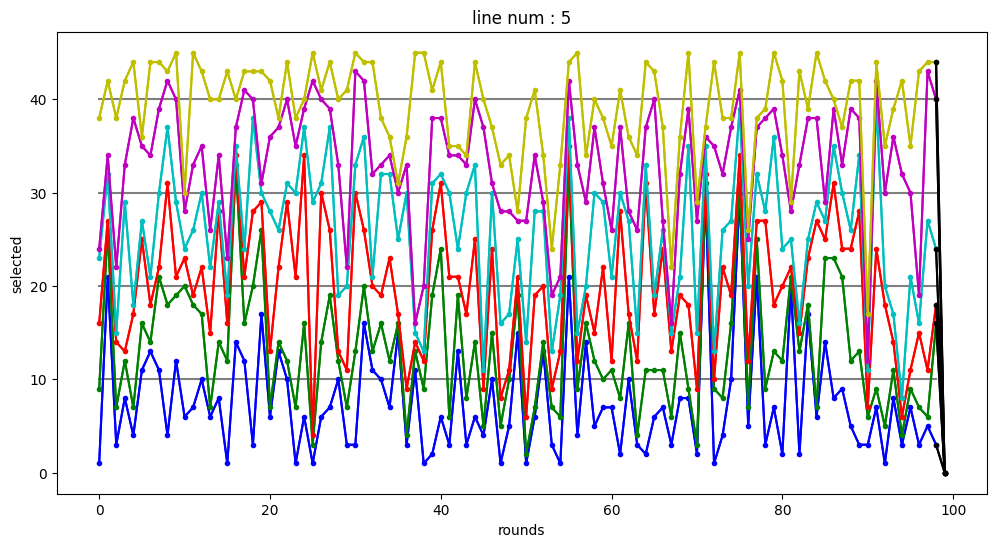

In [7]:
ext_datas = []

for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False
show_cnt = 100

start_pos = row_length - show_cnt

show_data = []
for i in range(6):
    show_data.append(row_list[i][start_pos:])

draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40])


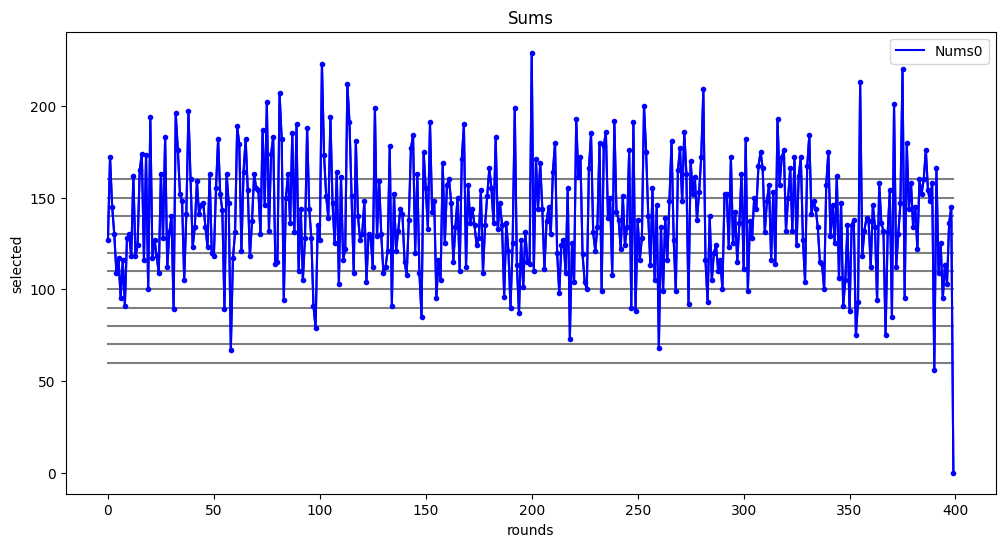

candidate =  0
candidate =  dict_values([0, 0, 0, 0, 0, 0])
last      =  [127, 172, 145, 130, 109, 117, 95, 116, 91, 128, 130, 118, 162, 118, 124, 165, 174, 116, 173, 100, 194, 117, 127, 118, 109, 163, 128, 183, 112, 131, 140, 89, 196, 176, 152, 148, 105, 141, 197, 160, 123, 134, 159, 141, 146, 147, 134, 123, 163, 120, 118, 155, 182, 152, 143, 89, 163, 147, 67, 117, 131, 189, 179, 121, 164, 182, 154, 118, 137, 163, 155, 154, 130, 187, 146, 202, 132, 174, 183, 114, 115, 207, 182, 94, 150, 163, 136, 185, 131, 190, 110, 144, 105, 128, 188, 144, 128, 91, 79, 135, 127, 223, 173, 151, 139, 194, 147, 125, 164, 103, 161, 116, 122, 212, 191, 151, 109, 181, 140, 127, 130, 148, 104, 130, 128, 112, 199, 129, 159, 130, 109, 112, 121, 178, 91, 152, 121, 132, 144, 141, 115, 108, 138, 177, 184, 120, 163, 109, 85, 175, 155, 133, 191, 142, 148, 95, 116, 105, 169, 125, 157, 160, 147, 115, 134, 150, 110, 171, 190, 112, 157, 136, 144, 135, 124, 128, 154, 109, 135, 151, 166, 155, 136, 183, 133, 147, 135, 96

In [8]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

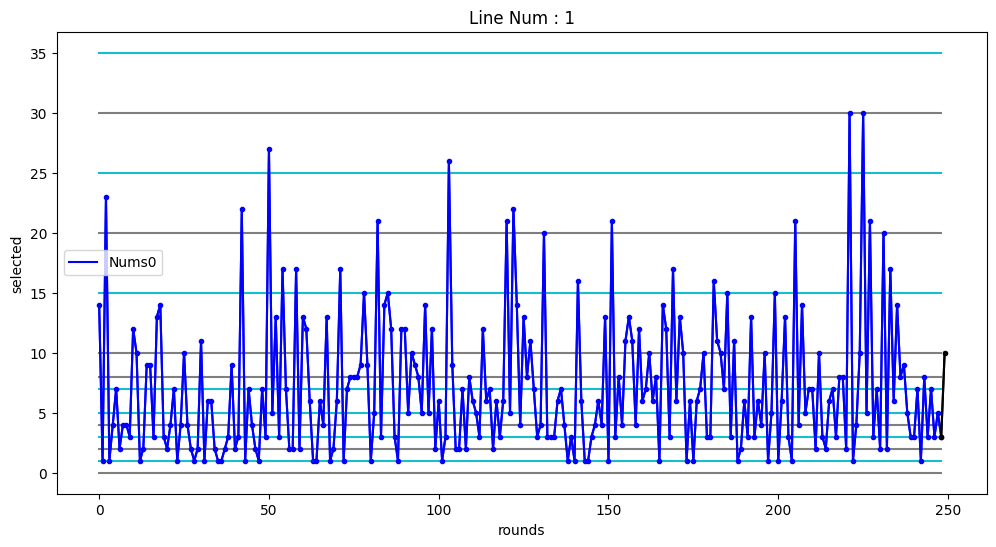

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
사용자 선택       = 10
마지막 값        = 3
마지막 값들       = [8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3]
자주 나오는 값(부분) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (8, 8), (10, 8), (2, 10), (4, 10), (7, 13), (1, 15), (6, 18), (3, 25)]
자주 나오는 값(전체) = [(23, 1), (27, 1), (26, 1), (18, 2), (22, 2), (30, 2), (20, 3), (19, 4), (15, 5), (17, 7), (16, 7), (21, 7), (11, 10), (13, 13), (14, 14), (12, 16), (10, 16), (9, 16), (8, 19), (4, 27), (5, 27), (7, 27), (6, 32), (2, 43), (1, 46), (3, 51)]
마지막 수의 앞과 뒤  = [[14, 3, 4], [2, 3, 2], [6, 3, 1], [1, 3, 14], [12, 3, 14], [5, 3, 13], [9, 3, 2], [16, 3, 3], [3, 3, 9], [2, 3, 1], [8, 3, 3], [3, 3, 1], [2, 3, 2], [21, 3, 7], [2, 3, 3], [3, 3, 1

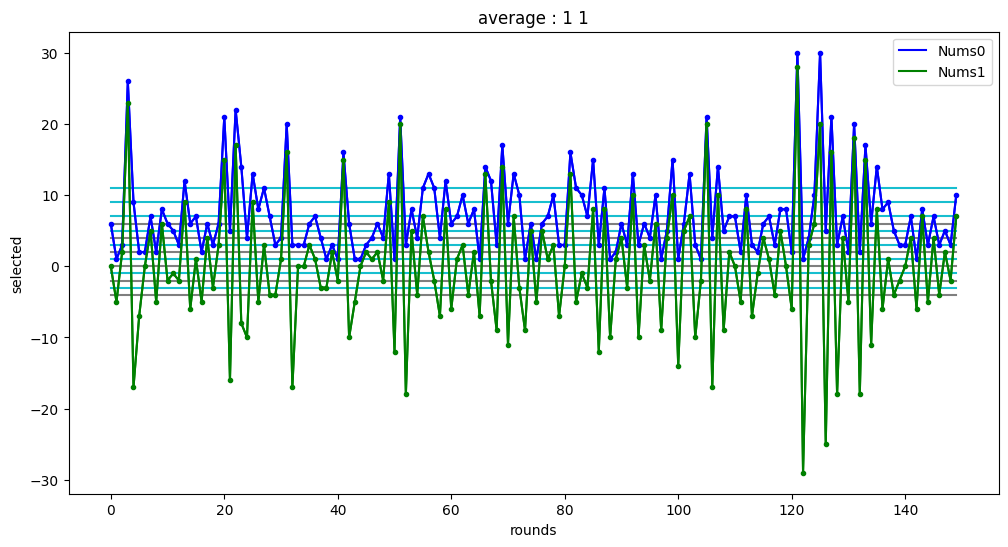

________________________________________
최소값          = [1.0, 1.5, 2.0, 2.0, 2.0]
최대값          = [16.0, 17.5, 17.5, 18.0, 20.0]
마지막          = [5.0, 5.0, 4.0, 4.0, 6.5]


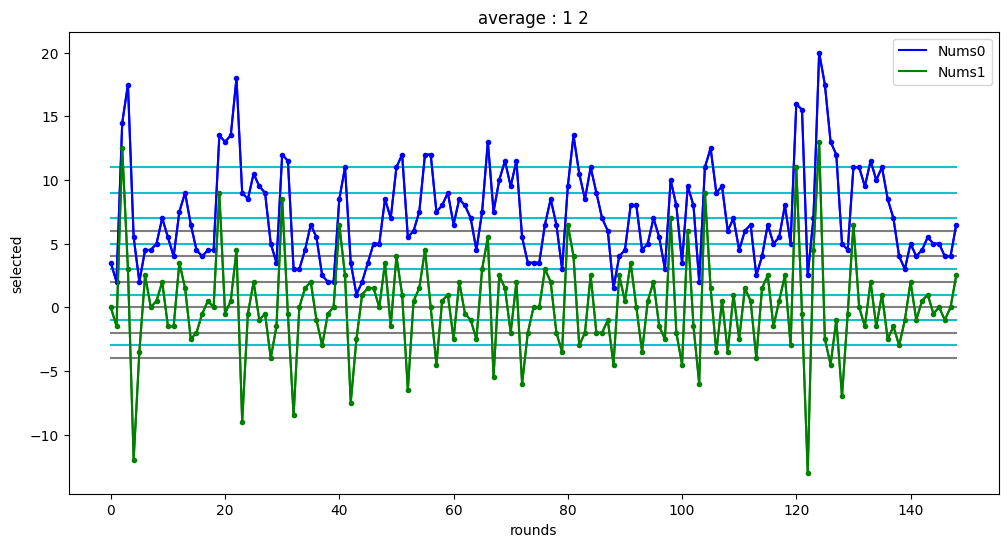

________________________________________
최소값          = [3.0, 3.0, 3.2, 3.6, 3.8]
최대값          = [13.2, 13.6, 13.8, 14.0, 15.0]
마지막          = [5.2, 4.4, 5.2, 4.2, 5.6]


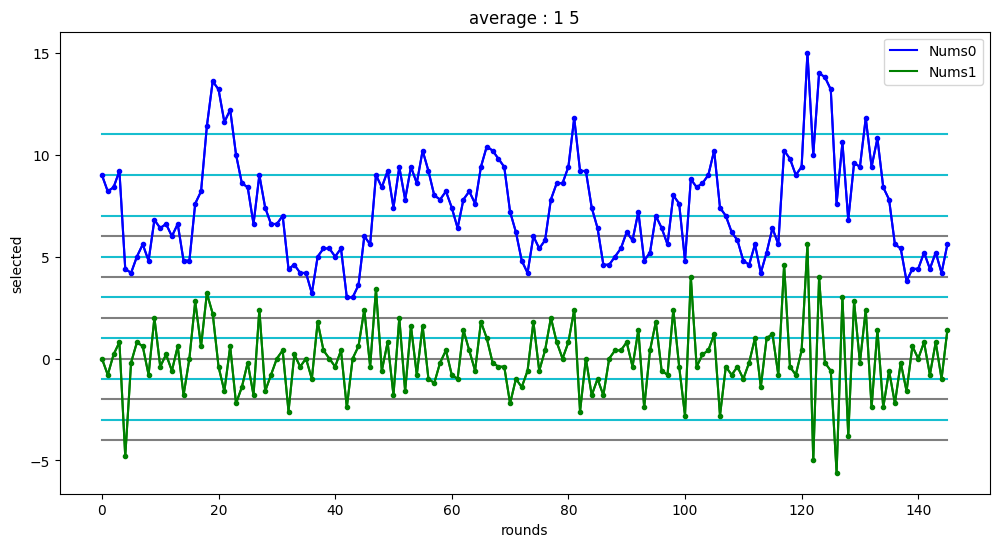

________________________________________
최소값          = [3.5, 3.75, 4.0, 4.125, 4.125]
최대값          = [11.625, 12.25, 12.25, 12.875, 13.0]
마지막          = [4.625, 4.375, 4.625, 4.625, 5.0]


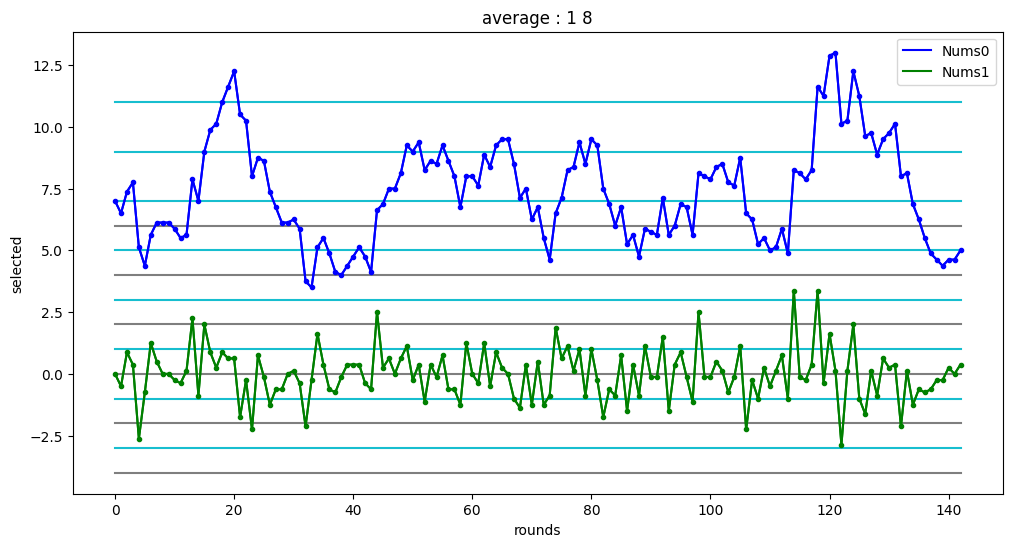

________________________________________
최소값          = [4.0, 4.2, 4.3, 4.3, 4.5]
최대값          = [11.3, 11.3, 11.4, 11.7, 11.9]
마지막          = [5.4, 4.9, 4.5, 4.3, 5.0]


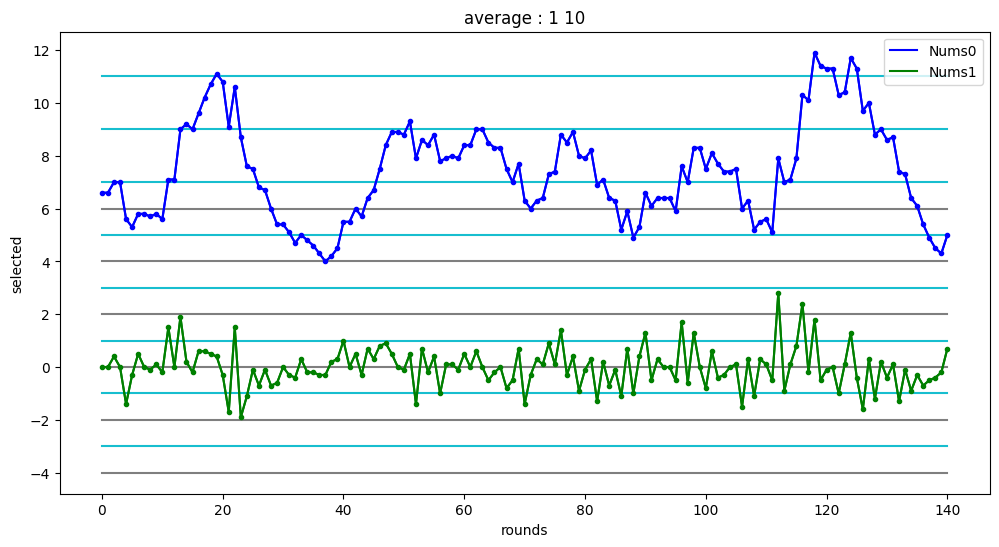

________________________________________
최소값          = [4.230769230769231, 4.230769230769231, 4.3076923076923075, 4.384615384615385, 4.538461538461538]
최대값          = [10.846153846153847, 11.0, 11.076923076923077, 11.153846153846153, 11.692307692307692]
마지막          = [7.0, 5.923076923076923, 5.846153846153846, 5.0, 5.153846153846154]


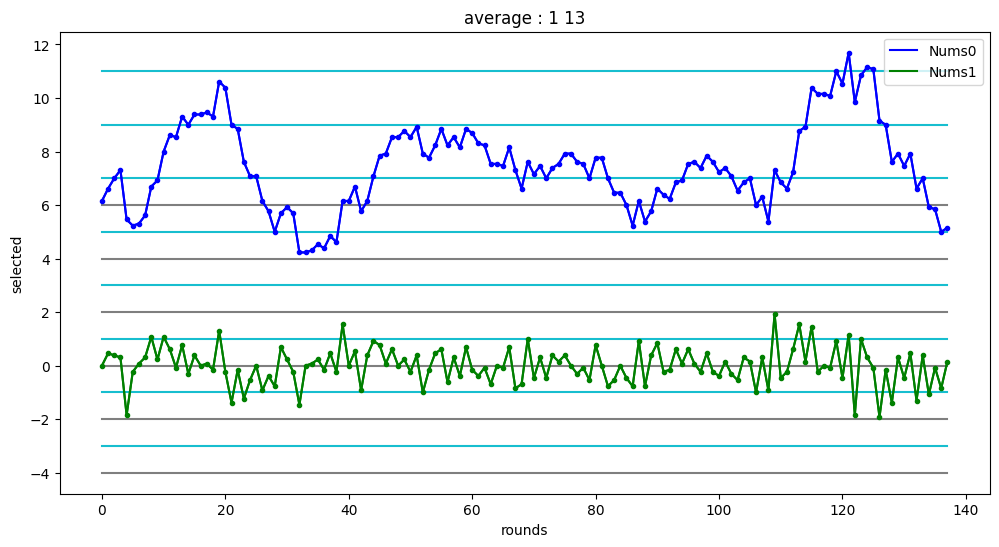

________________________________________
최소값          = [4.133333333333334, 4.333333333333333, 4.4, 4.733333333333333, 5.066666666666666]
최대값          = [10.533333333333333, 10.6, 10.666666666666666, 10.8, 11.466666666666667]
마지막          = [7.533333333333333, 6.4, 6.6, 5.666666666666667, 5.933333333333334]


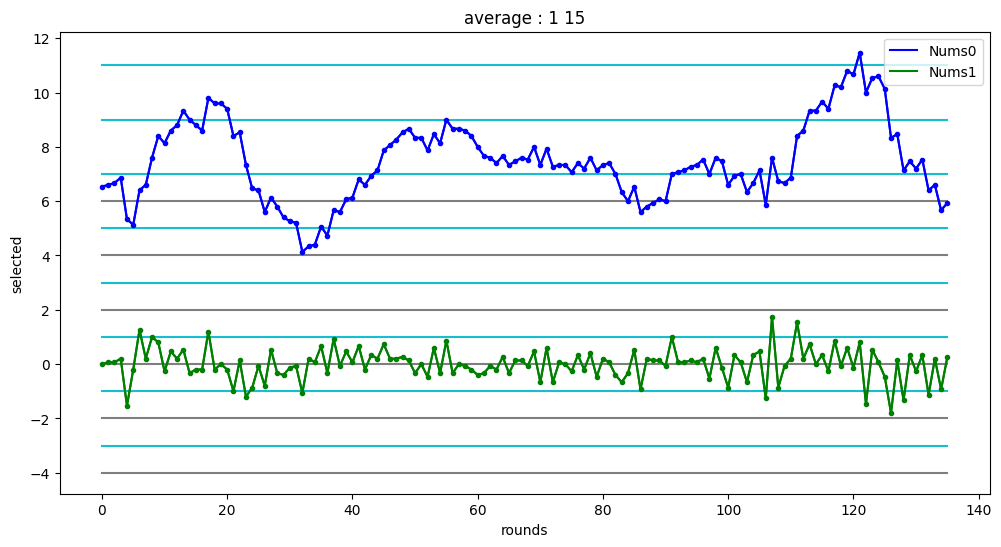

________________________________________
최소값          = [4.95, 5.1, 5.3, 5.35, 5.35]
최대값          = [10.0, 10.0, 10.05, 10.2, 10.35]
마지막          = [7.55, 7.45, 6.65, 6.65, 6.8]


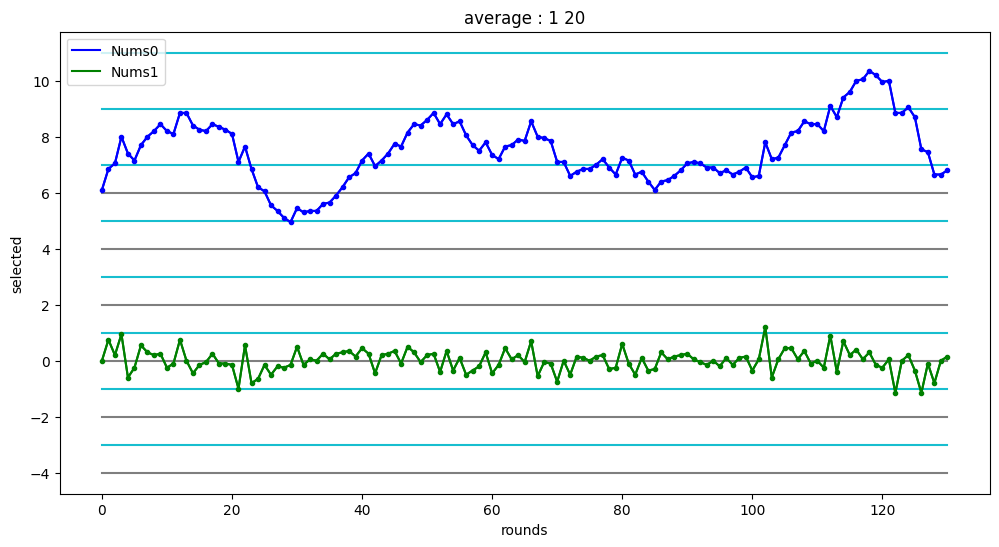

________________________________________
최소값          = [5.56, 5.68, 5.76, 5.8, 5.84]
최대값          = [9.12, 9.12, 9.16, 9.2, 9.24]
마지막          = [9.04, 7.96, 8.12, 8.08, 8.08]


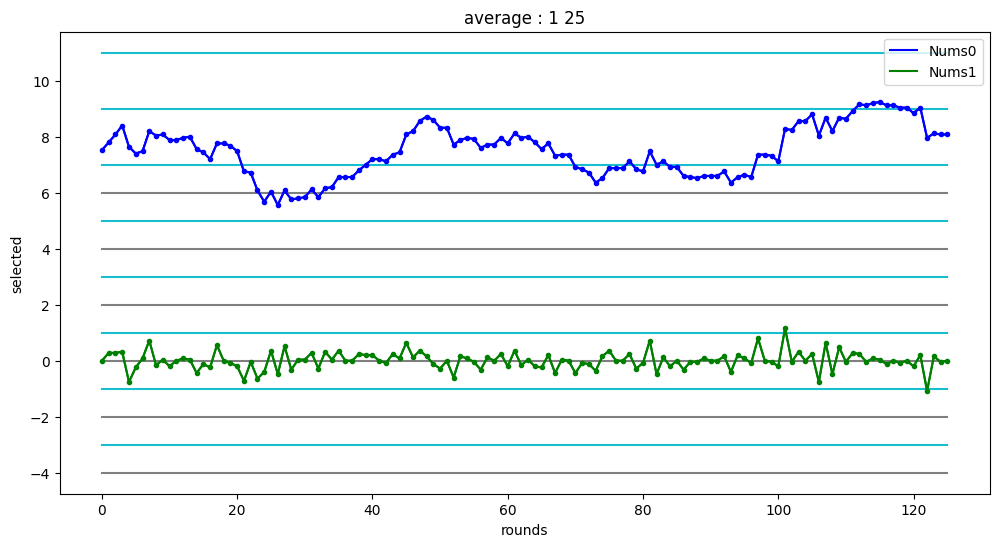

________________________________________
최소값          = [6.133333333333334, 6.2, 6.2, 6.266666666666667, 6.266666666666667]
최대값          = [8.633333333333333, 8.666666666666666, 8.733333333333333, 8.8, 8.9]
마지막          = [8.466666666666667, 8.333333333333334, 8.4, 8.233333333333333, 8.3]


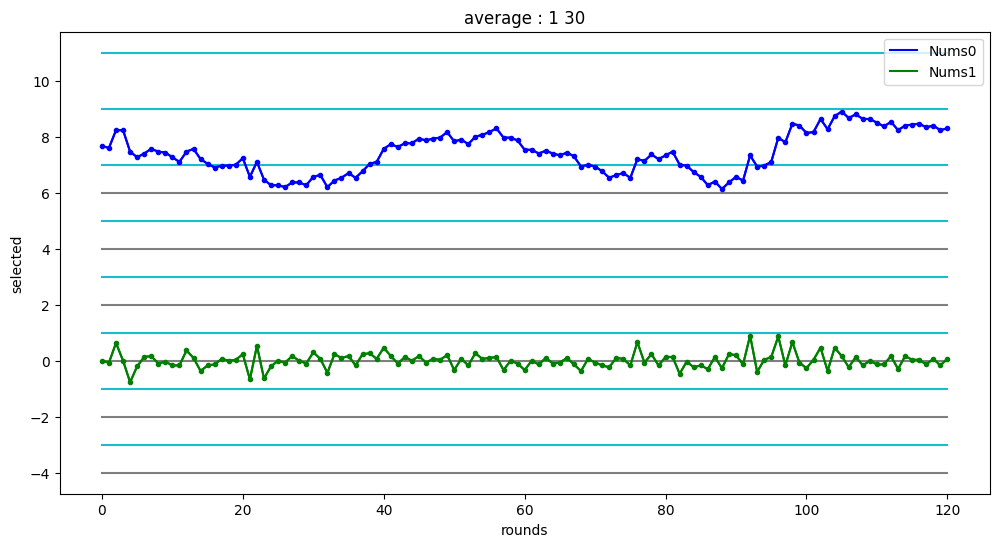

In [9]:
Round = 1
############################
selected = Round - 1
ext_data = 10
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 9, 11]
lengths = [1, 2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 250
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

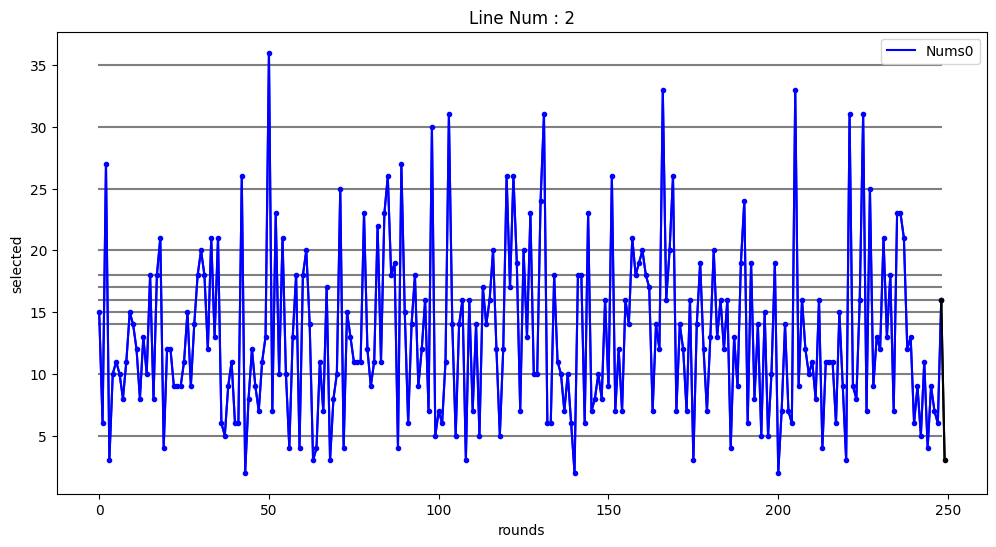

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
최대 값         = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 3
마지막 값        = 16
마지막 값들       = [13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16]
자주 나오는 값(부분) = [(15, 2), (10, 2), (31, 2), (23, 2), (21, 3), (18, 3), (20, 3), (3, 3), (4, 3), (8, 3), (5, 3), (19, 5), (6, 5), (11, 5), (14, 6), (13, 6), (9, 8), (12, 8), (16, 9), (7, 11)]
자주 나오는 값(전체) = [(23, 8), (20, 9), (3, 10), (19, 10), (17, 12), (5, 12), (8, 16), (4, 16), (21, 17), (13, 17), (15, 19), (12, 20), (14, 20), (16, 21), (9, 23), (18, 24), (10, 24), (6, 25), (11, 26), (7, 27)]
마지막 수의 앞과 뒤  = [[-1, 16, 18], [15, 16, 11], [8, 16, 18], [18, 16, 2], [22, 16, 17], [27, 16, 24], [24, 16, 15], [12, 16, 7], [14, 16, 3], [3, 16, 7], [14, 16, 20], [8, 16, 9], [7, 16, 14], [33, 16, 20], [7, 16, 3], [13, 16, 12], [12, 16, 4], [9, 16, 12], [8, 16, 4], [8, 16, 31], [6, 16, -1]]
_____

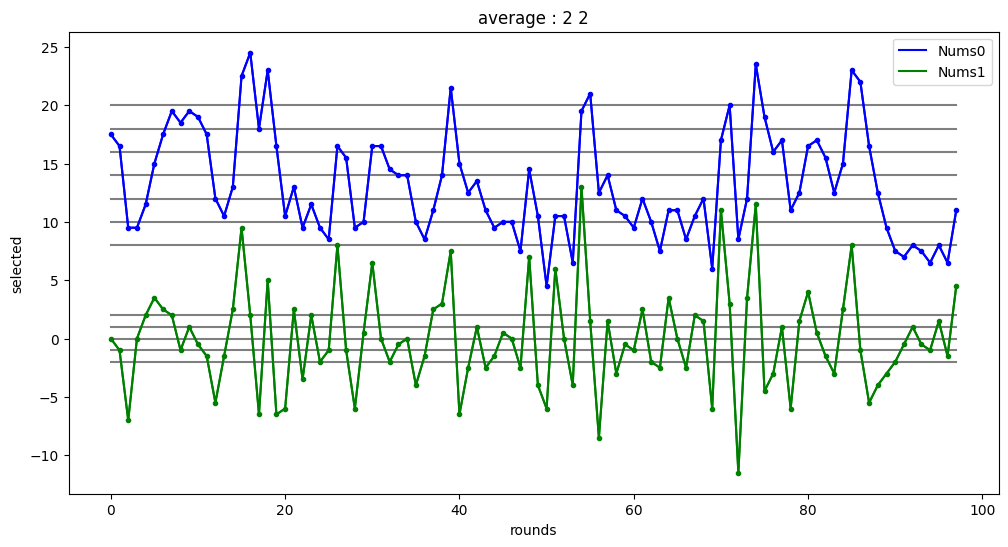

________________________________________
최소값          = [7.0, 7.2, 7.2, 7.4, 7.6]
최대값          = [19.0, 19.0, 19.2, 20.4, 21.4]
마지막          = [7.0, 7.6, 7.2, 7.4, 8.4]


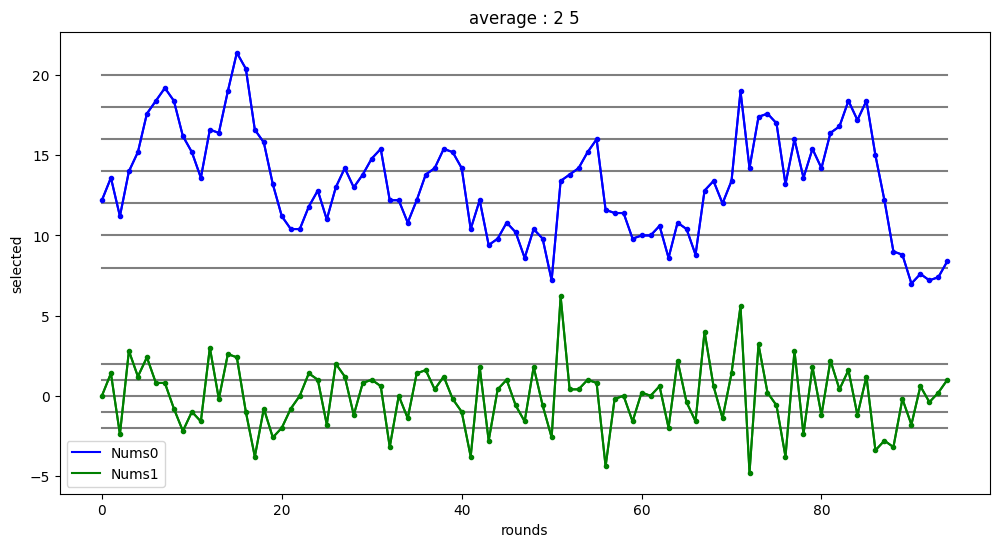

________________________________________
최소값          = [7.125, 8.0, 8.375, 8.625, 8.75]
최대값          = [17.5, 17.5, 17.75, 17.875, 18.125]
마지막          = [10.125, 8.625, 8.0, 7.125, 8.375]


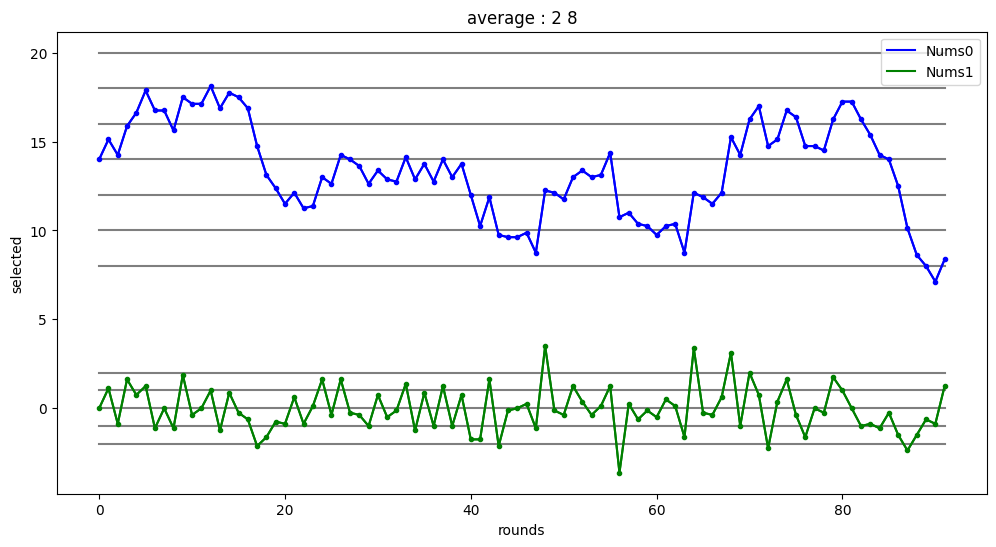

________________________________________
최소값          = [8.2, 8.6, 9.0, 9.4, 9.7]
최대값          = [17.0, 17.4, 17.6, 17.9, 18.3]
마지막          = [12.7, 11.3, 9.7, 8.2, 8.6]


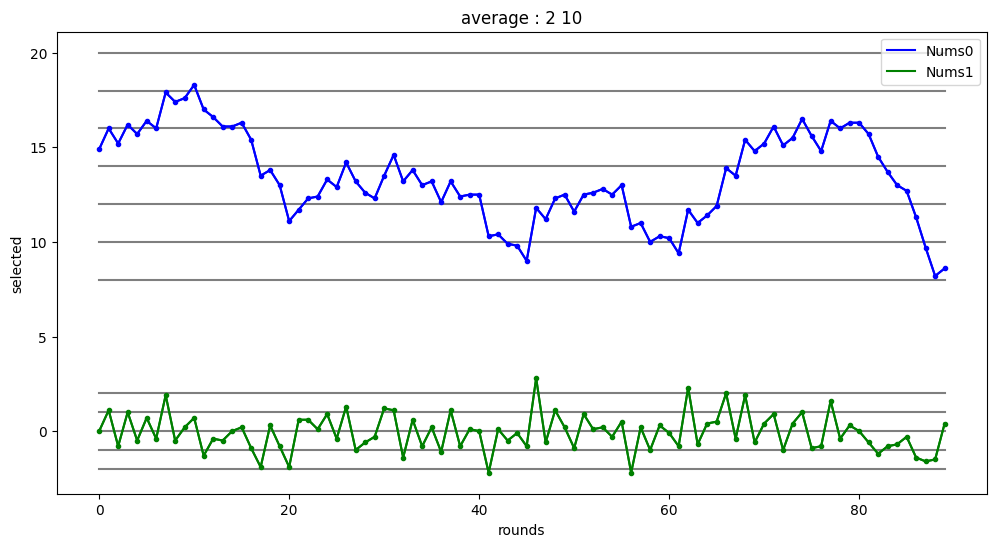

________________________________________
최소값          = [9.76923076923077, 10.076923076923077, 10.076923076923077, 10.76923076923077, 10.76923076923077]
최대값          = [17.153846153846153, 17.307692307692307, 17.46153846153846, 17.615384615384617, 18.53846153846154]
마지막          = [12.692307692307692, 12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923]


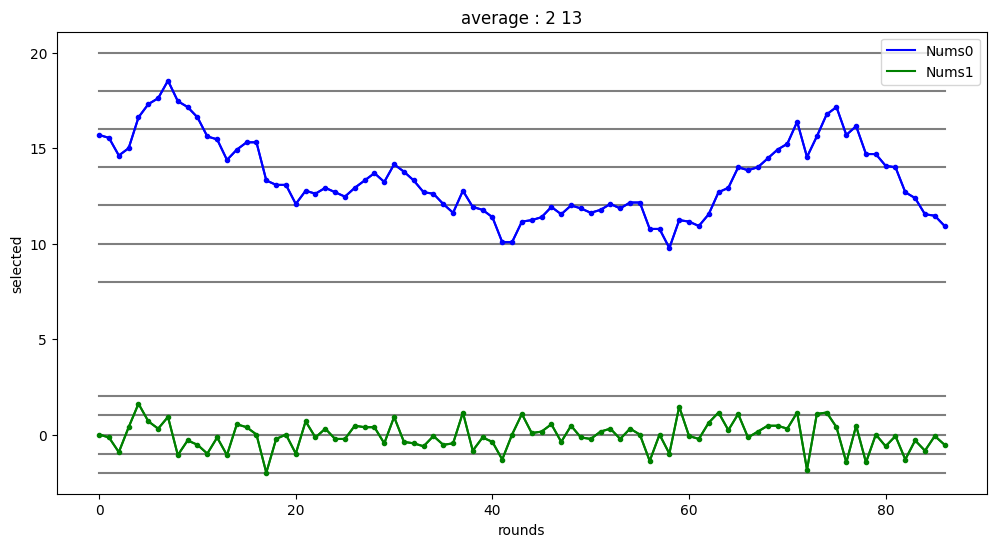

________________________________________
최소값          = [10.133333333333333, 10.733333333333333, 10.866666666666667, 11.066666666666666, 11.133333333333333]
최대값          = [16.8, 16.866666666666667, 17.466666666666665, 17.466666666666665, 18.066666666666666]
마지막          = [13.2, 13.0, 12.066666666666666, 11.6, 11.466666666666667]


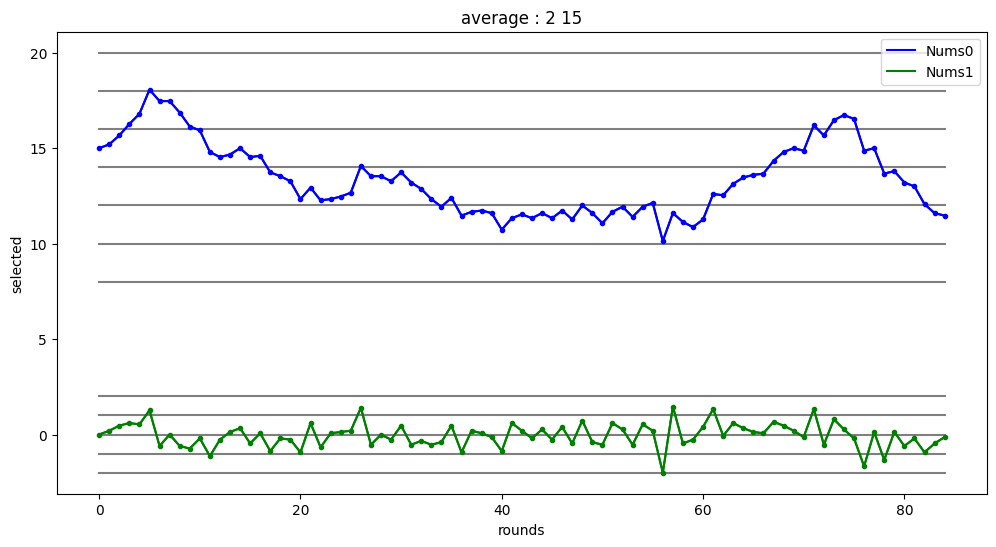

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.1, 11.1]
최대값          = [15.9, 16.15, 16.35, 16.5, 16.6]
마지막          = [14.15, 13.05, 13.05, 12.1, 12.45]


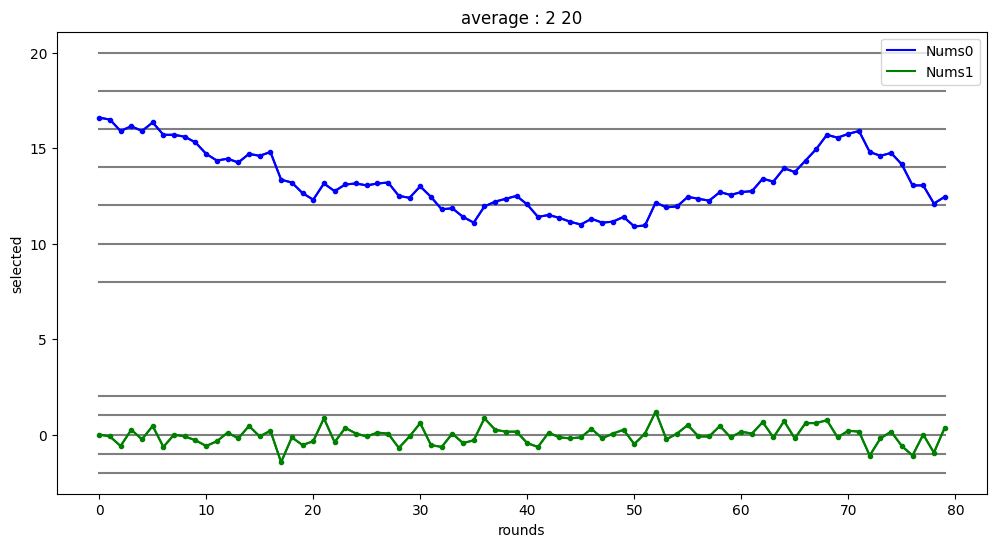

________________________________________
최소값          = [10.8, 10.8, 10.88, 11.08, 11.12]
최대값          = [15.28, 15.28, 15.28, 15.4, 15.52]
마지막          = [14.0, 14.24, 13.28, 13.16, 13.48]


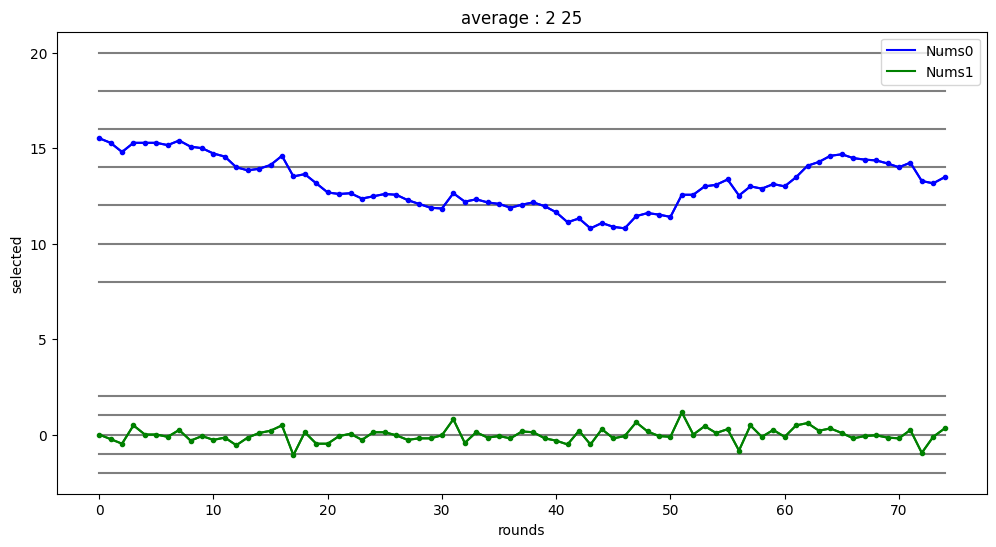

________________________________________
최소값          = [10.733333333333333, 11.233333333333333, 11.233333333333333, 11.3, 11.433333333333334]
최대값          = [14.9, 14.9, 15.033333333333333, 15.2, 15.2]
마지막          = [13.4, 13.333333333333334, 13.2, 13.2, 13.233333333333333]


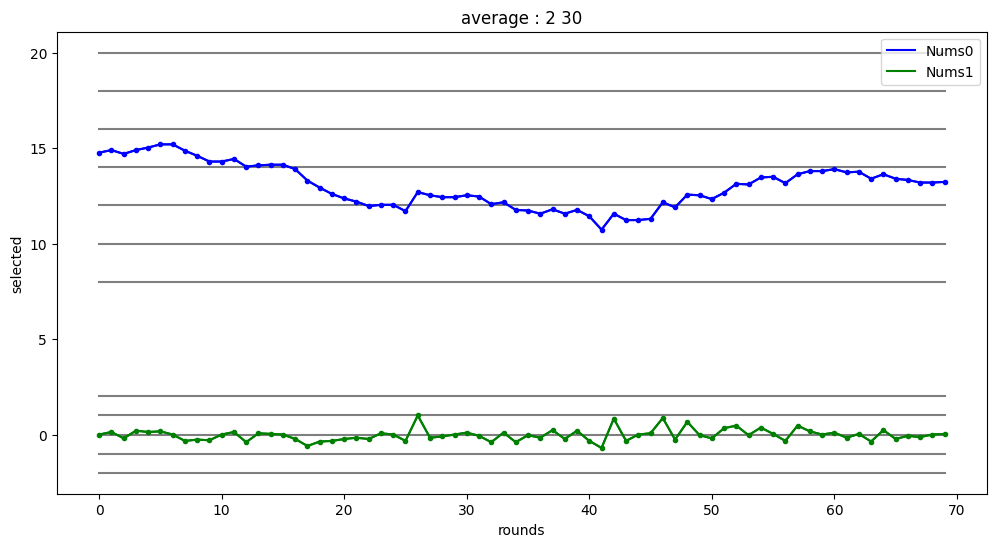

In [8]:
Round = 2
###########################
selected = Round - 1
ext_data = 3
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 14, 15, 16, 17, 18, 20, 25, 30, 35]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 8, 10, 12, 14, 16, 18, 20]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

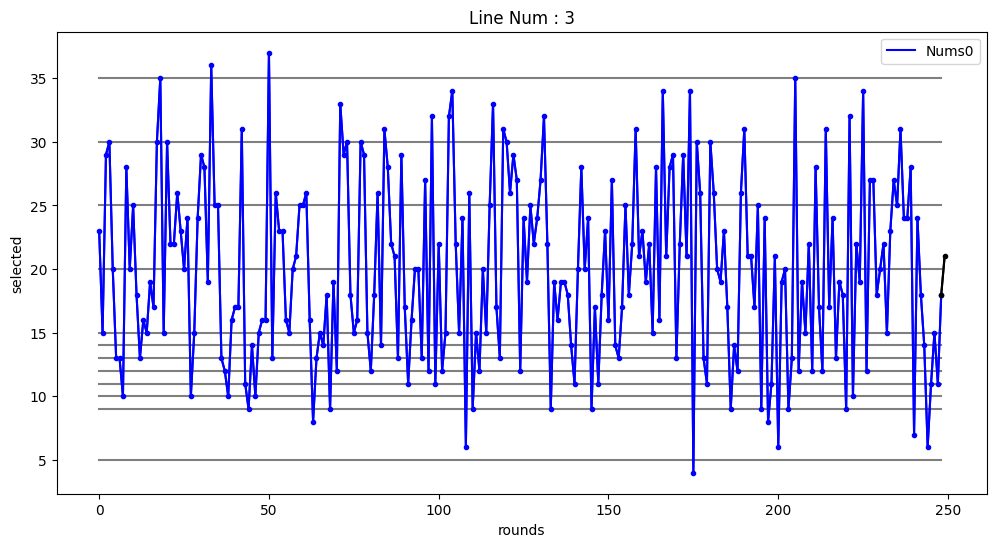

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
최대 값         = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35]
사용자 선택       = 21
마지막 값        = 18
마지막 값들       = [18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18]
자주 나오는 값(부분) = [(14, 3), (25, 3), (23, 3), (34, 3), (26, 3), (20, 3), (27, 4), (31, 4), (15, 4), (28, 4), (11, 4), (9, 4), (13, 5), (17, 5), (18, 5), (12, 5), (24, 5), (22, 6), (19, 6), (21, 7)]
자주 나오는 값(전체) = [(21, 12), (26, 12), (14, 12), (31, 13), (29, 13), (25, 14), (30, 14), (23, 15), (11, 15), (28, 17), (20, 17), (24, 17), (22, 18), (15, 19), (17, 19), (18, 20), (16, 21), (19, 22), (13, 24), (12, 25)]
마지막 수의 앞과 뒤  = [[4, 18, 9], [6, 18, 8]]
________________________________________
최소값          = [8.5, 9.5, 10.0, 11.0, 11.5]
마지막          = [8.5, 13.0, 13.0, 14.5, 19.5]


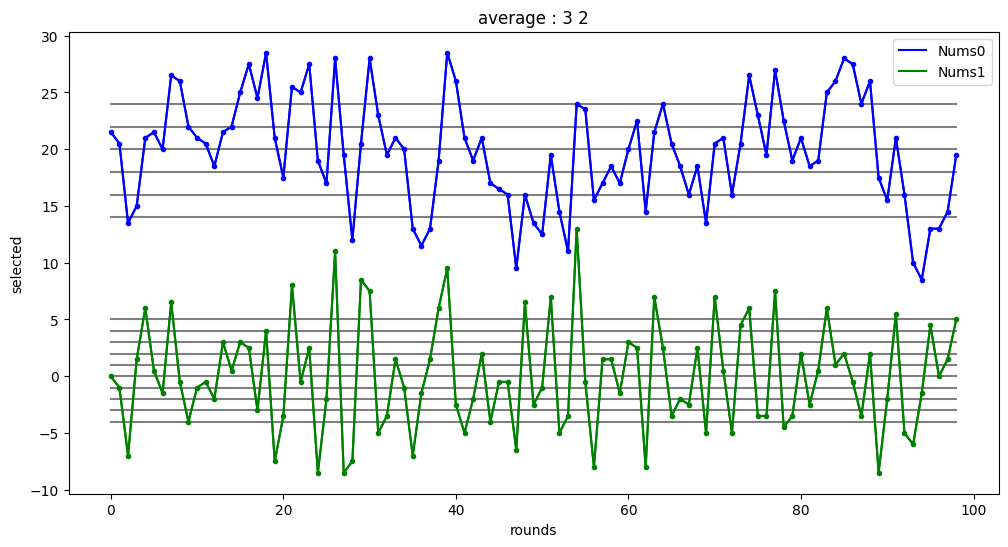

________________________________________
최소값          = [11.4, 12.2, 12.8, 13.0, 13.4]
마지막          = [14.6, 12.8, 11.4, 12.2, 15.2]


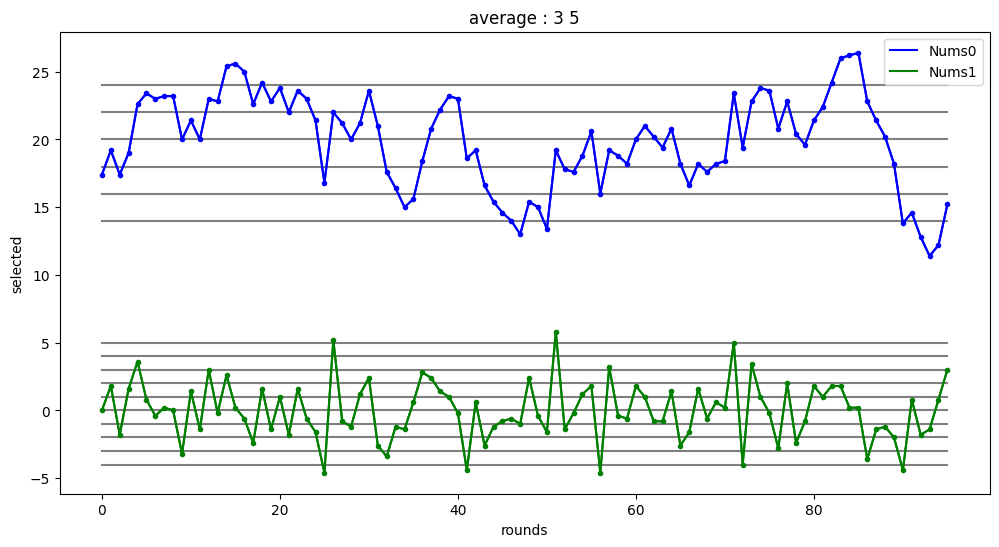

________________________________________
최소값          = [13.25, 13.375, 14.25, 14.625, 14.75]
마지막          = [16.5, 15.375, 13.25, 14.625, 14.25]


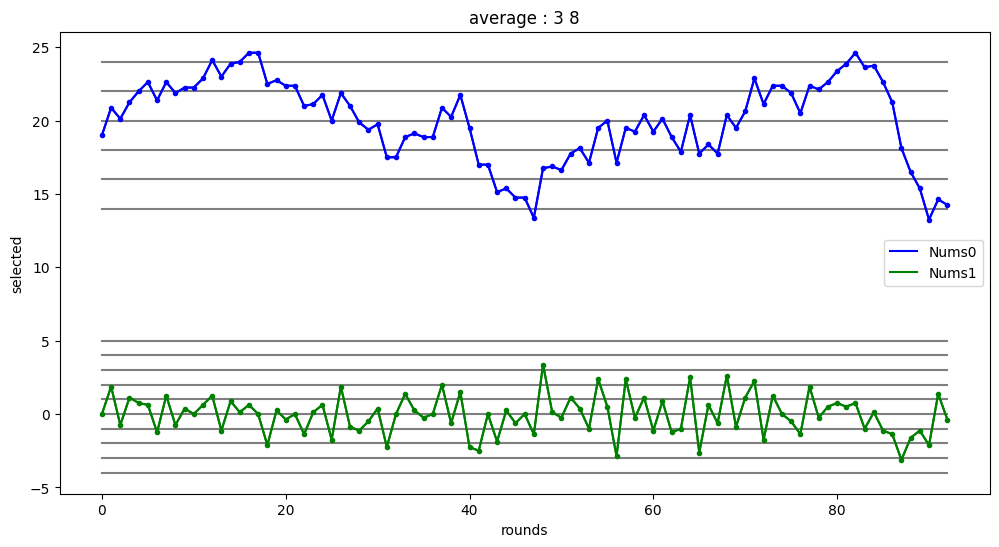

________________________________________
최소값          = [14.0, 14.5, 15.2, 15.2, 15.4]
마지막          = [18.7, 17.1, 15.8, 15.2, 14.5]


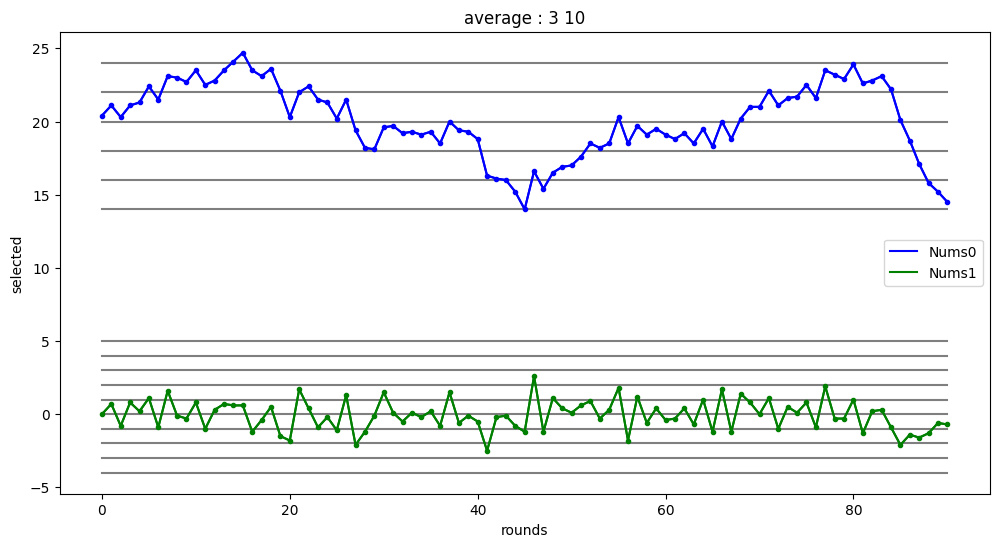

________________________________________
최소값          = [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
마지막          = [20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077, 17.0]


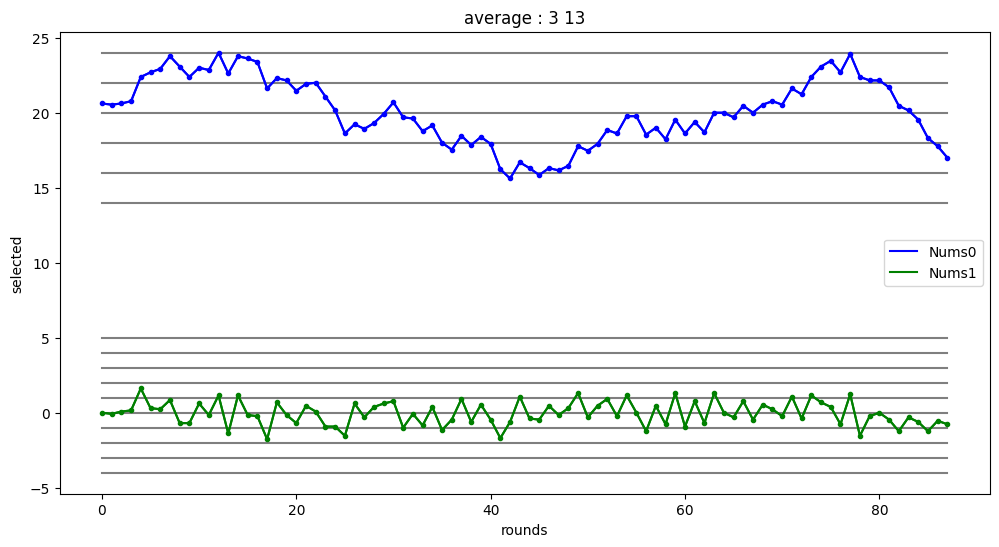

________________________________________
최소값          = [16.2, 16.4, 16.4, 16.533333333333335, 16.666666666666668]
마지막          = [19.933333333333334, 19.466666666666665, 19.2, 18.866666666666667, 18.466666666666665]


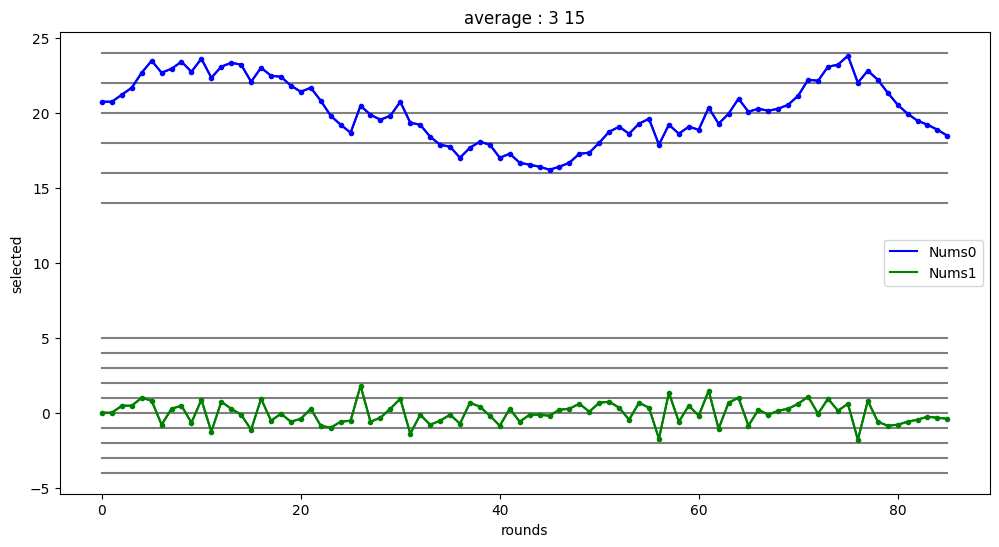

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15]
마지막          = [20.15, 20.3, 19.5, 19.05, 19.2]


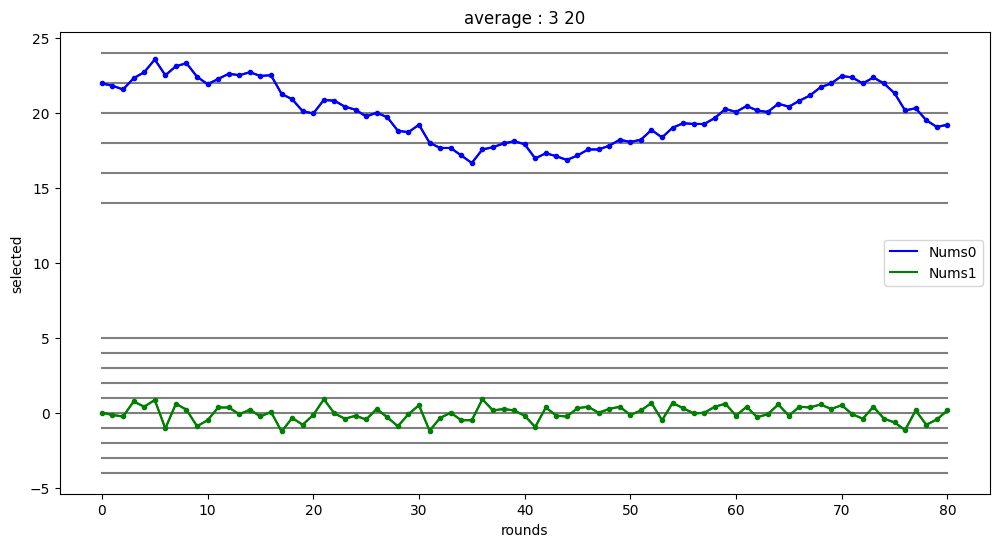

________________________________________
최소값          = [17.24, 17.36, 17.36, 17.44, 17.48]
마지막          = [20.8, 20.12, 20.16, 20.0, 20.08]


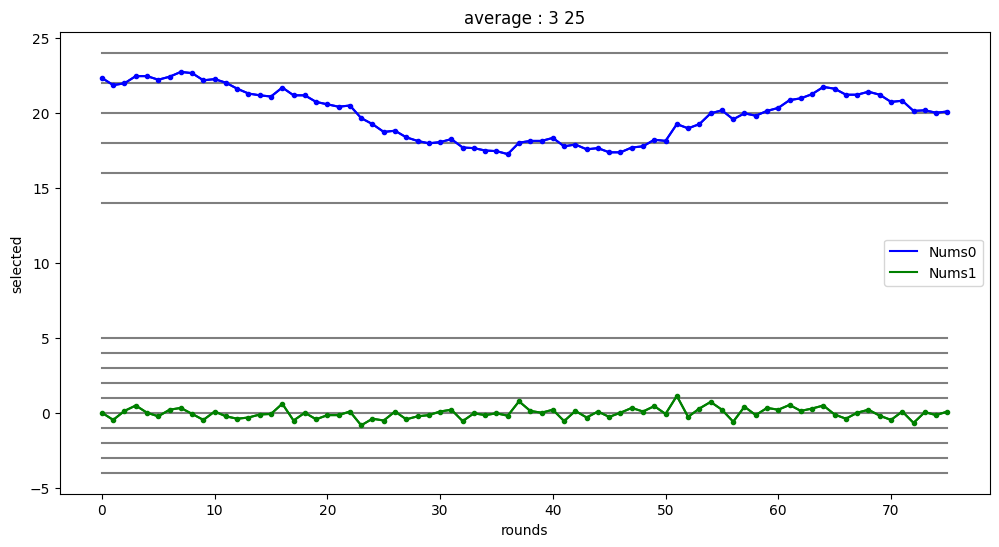

________________________________________
최소값          = [17.533333333333335, 17.566666666666666, 17.566666666666666, 17.6, 17.733333333333334]
마지막          = [20.1, 19.8, 19.733333333333334, 19.7, 19.8]


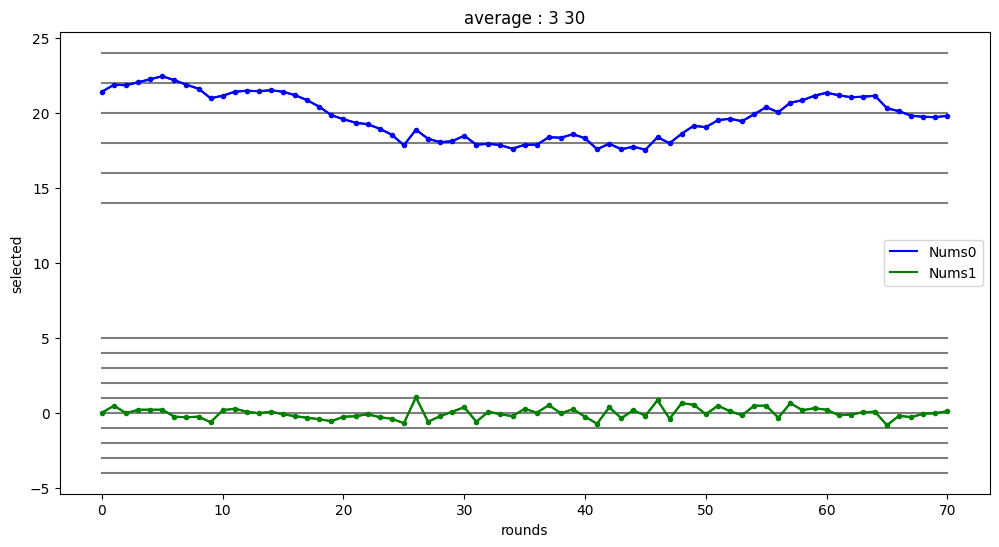

In [191]:
Round = 3
############################
selected = Round - 1
ext_data = 21
wanted_data_length = 20
helper_line_nums_1 = [5, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 14, 16, 18, 20, 22, 24]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

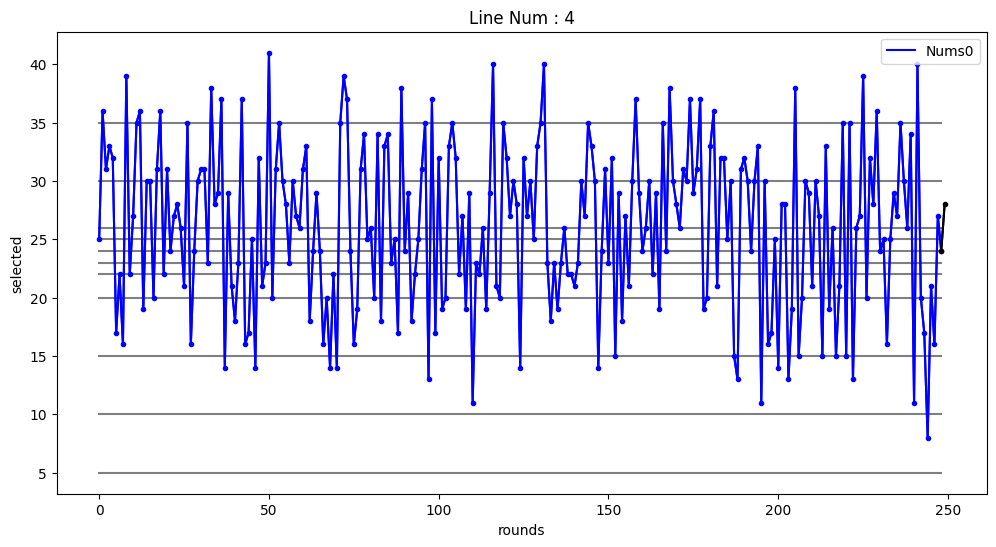

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
최대 값         = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 28
마지막 값        = 24
마지막 값들       = [36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24]
자주 나오는 값(부분) = [(11, 2), (17, 2), (37, 3), (31, 3), (33, 3), (13, 3), (16, 3), (19, 4), (35, 4), (20, 4), (25, 4), (32, 5), (27, 5), (21, 5), (24, 5), (26, 5), (28, 5), (15, 6), (29, 6), (30, 11)]
자주 나오는 값(전체) = [(16, 10), (14, 11), (20, 13), (18, 13), (38, 13), (19, 15), (25, 15), (33, 15), (28, 16), (23, 16), (24, 17), (22, 17), (21, 17), (29, 17), (27, 18), (32, 18), (31, 19), (35, 19), (26, 23), (30, 25)]
마지막 수의 앞과 뒤  = []
________________________________________
최소값          = [12.5, 14.0, 14.5, 16.0, 16.5]
마지막          = [14.5, 18.5, 21.5, 25.5, 26.0]


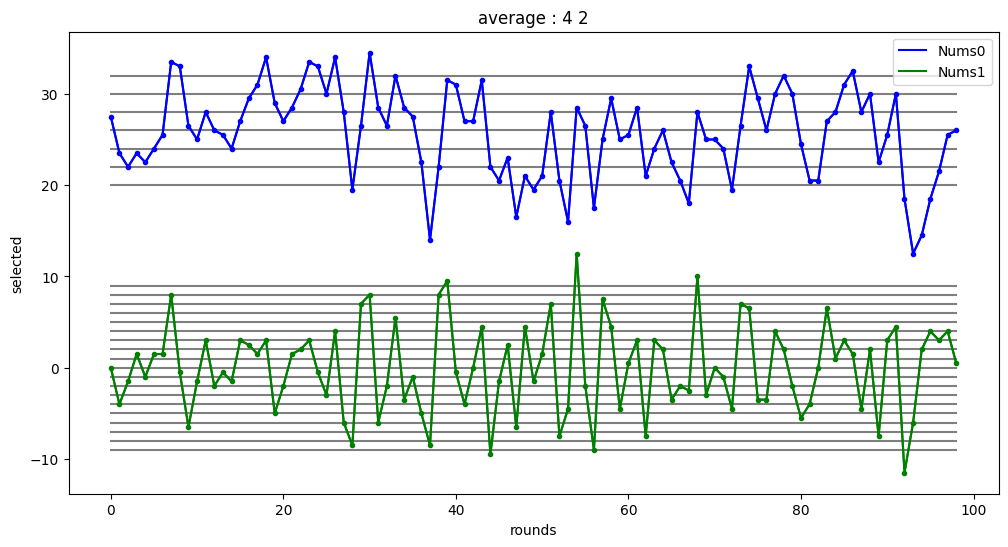

________________________________________
최소값          = [16.4, 17.8, 19.2, 19.2, 19.8]
마지막          = [21.2, 16.4, 17.8, 19.2, 23.2]


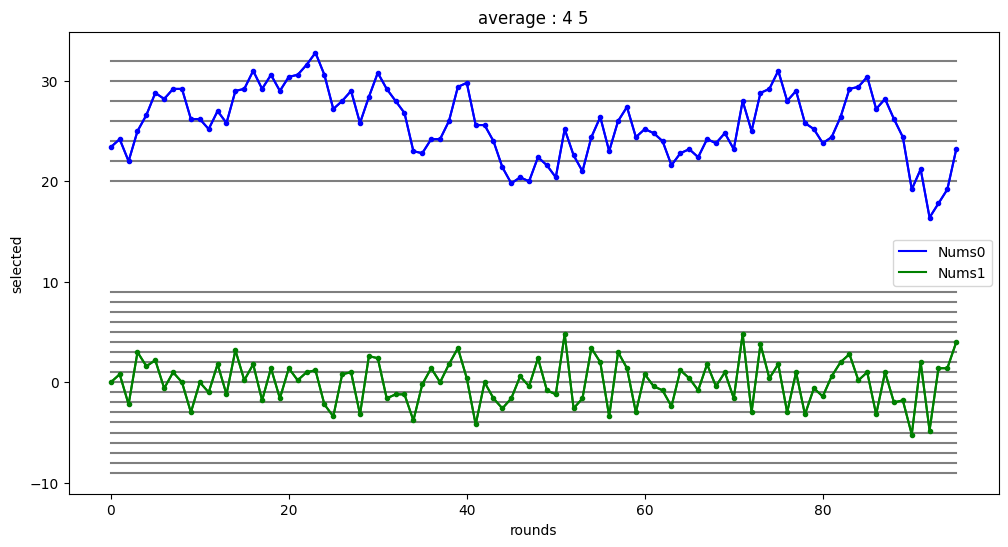

________________________________________
최소값          = [20.0, 20.0, 20.125, 20.875, 21.125]
마지막          = [22.125, 20.875, 20.0, 21.625, 20.125]


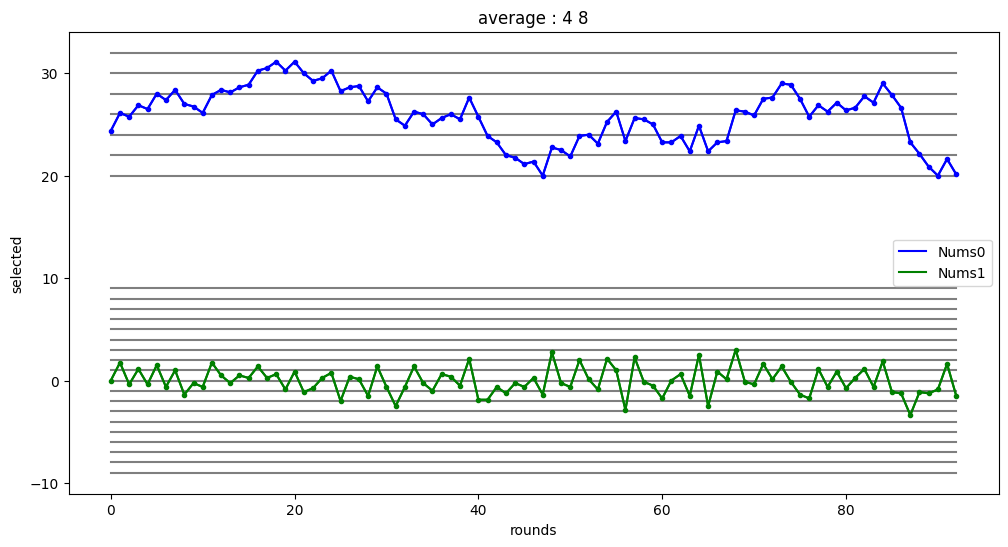

________________________________________
최소값          = [20.1, 21.2, 21.3, 21.5, 21.7]
마지막          = [24.2, 22.3, 22.0, 21.8, 21.2]


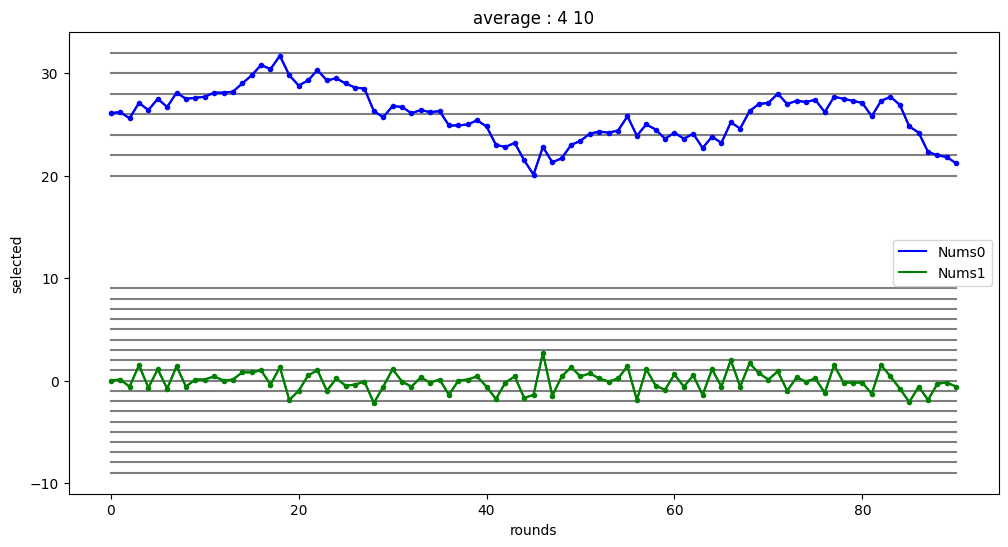

________________________________________
최소값          = [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
마지막          = [24.846153846153847, 24.153846153846153, 24.0, 23.76923076923077, 23.23076923076923]


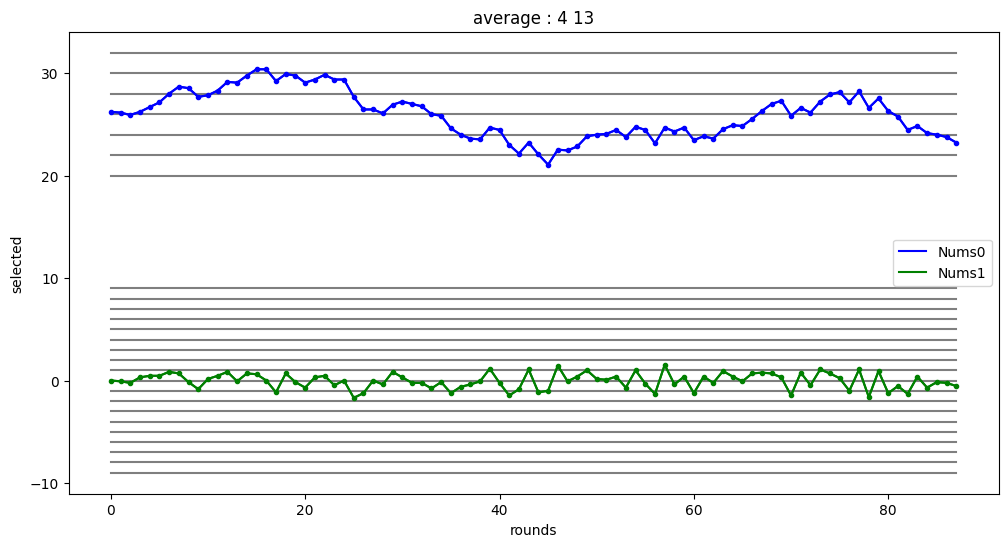

________________________________________
최소값          = [22.2, 22.466666666666665, 22.466666666666665, 22.733333333333334, 22.866666666666667]
마지막          = [24.266666666666666, 23.666666666666668, 24.4, 24.333333333333332, 24.266666666666666]


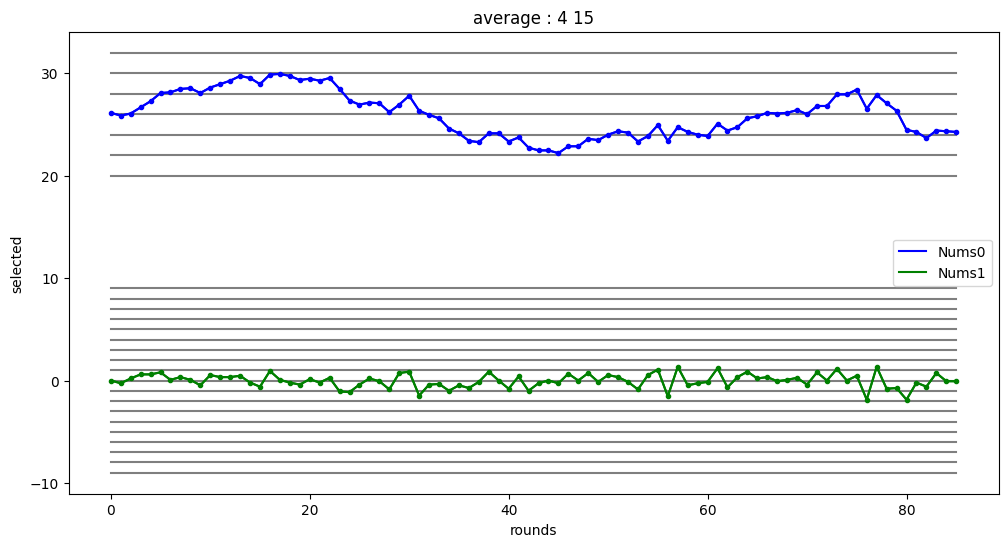

________________________________________
최소값          = [22.95, 22.95, 23.1, 23.1, 23.15]
마지막          = [25.2, 25.0, 24.75, 24.55, 24.15]


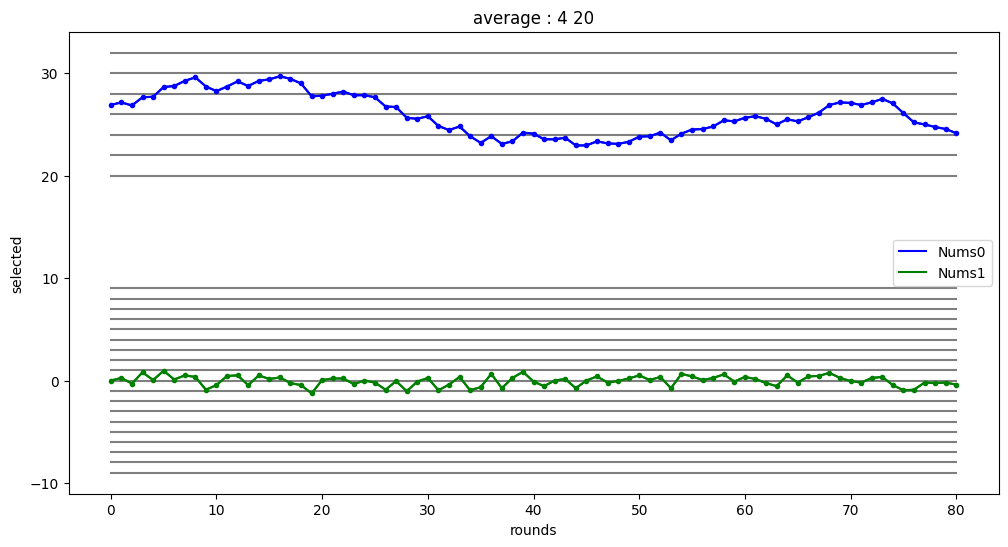

________________________________________
최소값          = [22.92, 23.0, 23.16, 23.24, 23.28]
마지막          = [25.76, 25.0, 25.56, 25.48, 25.52]


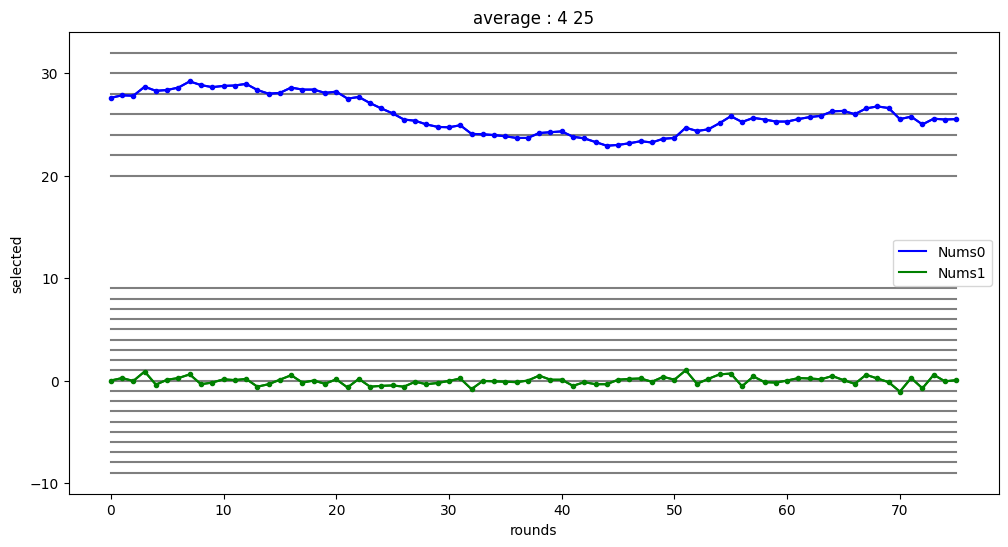

________________________________________
최소값          = [23.033333333333335, 23.233333333333334, 23.366666666666667, 23.566666666666666, 23.633333333333333]
마지막          = [25.2, 24.866666666666667, 25.266666666666666, 25.366666666666667, 25.133333333333333]


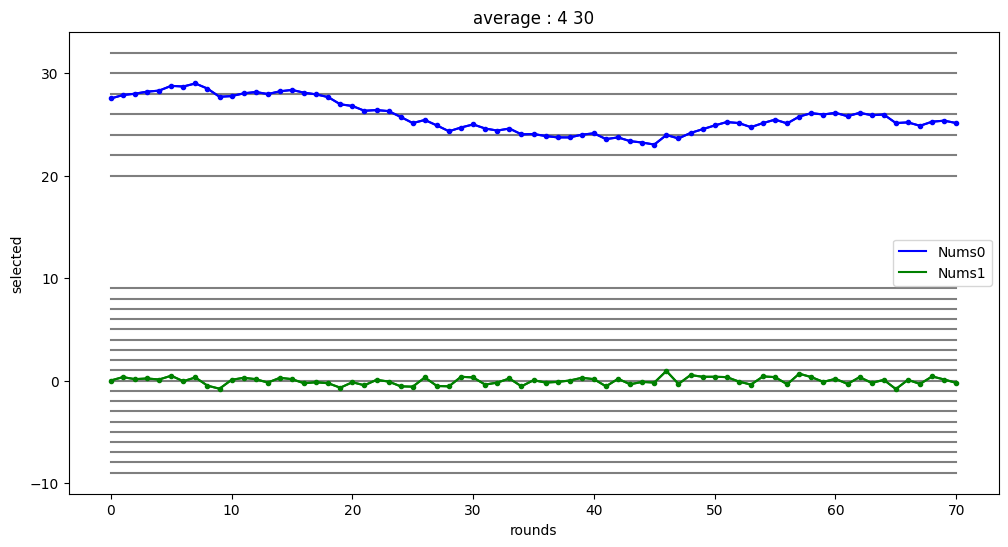

In [198]:
Round = 4
################################
selected = Round - 1
ext_data = 28
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 22, 23, 24, 25, 26, 30, 35]
helper_line_nums_2 = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 22, 24, 26, 28, 30, 32]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

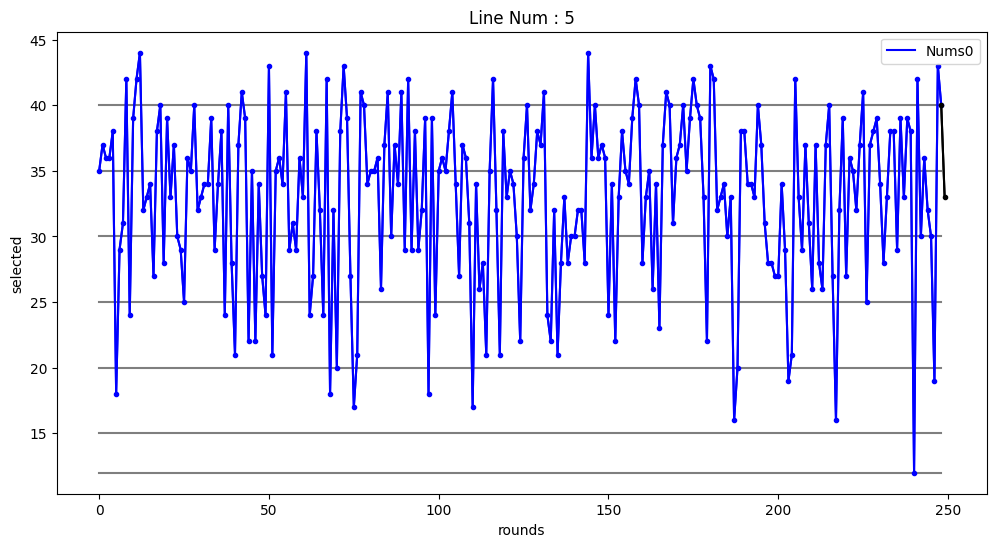

최소 값         = [12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택       = 33
마지막 값        = 40
마지막 값들       = [39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40]
자주 나오는 값(부분) = [(26, 7), (31, 7), (21, 7), (24, 8), (30, 9), (22, 9), (41, 11), (29, 12), (27, 13), (42, 13), (28, 13), (40, 14), (32, 15), (35, 17), (36, 18), (38, 18), (33, 18), (37, 19), (39, 20), (34, 23)]
자주 나오는 값(전체) = [(26, 9), (22, 10), (43, 12), (24, 13), (31, 13), (41, 13), (30, 14), (28, 15), (29, 16), (32, 17), (27, 18), (42, 18), (35, 19), (40, 19), (36, 22), (38, 23), (37, 23), (33, 28), (39, 28), (34, 30)]
마지막 수의 앞과 뒤  = []
________________________________________
최소값          = [25.2, 25.4, 26.0, 26.6, 27.2]
마지막          = [34.0, 29.4, 32.0, 32.8, 33.0]


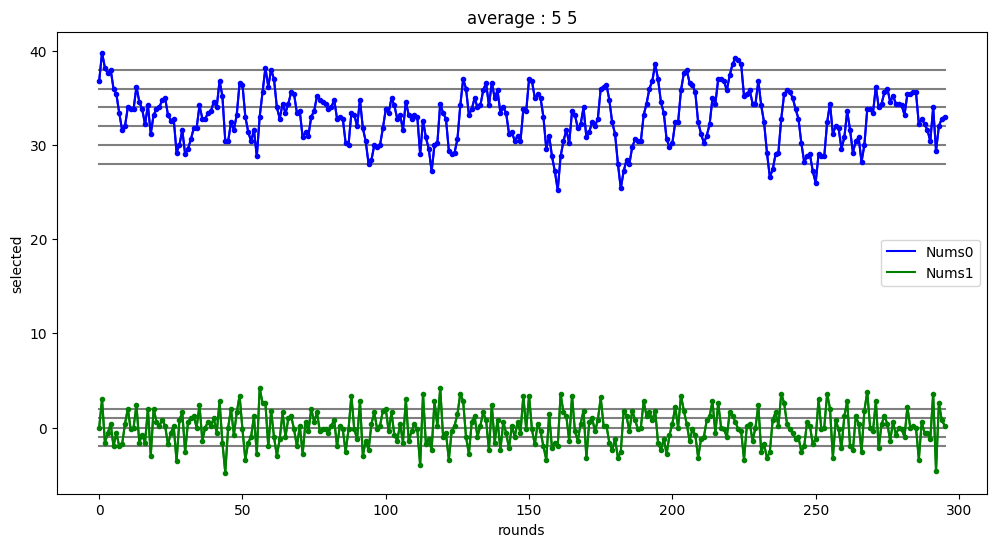

________________________________________
최소값          = [26.625, 27.25, 27.875, 28.0, 28.375]
마지막          = [32.375, 29.875, 30.5, 34.0, 32.875]


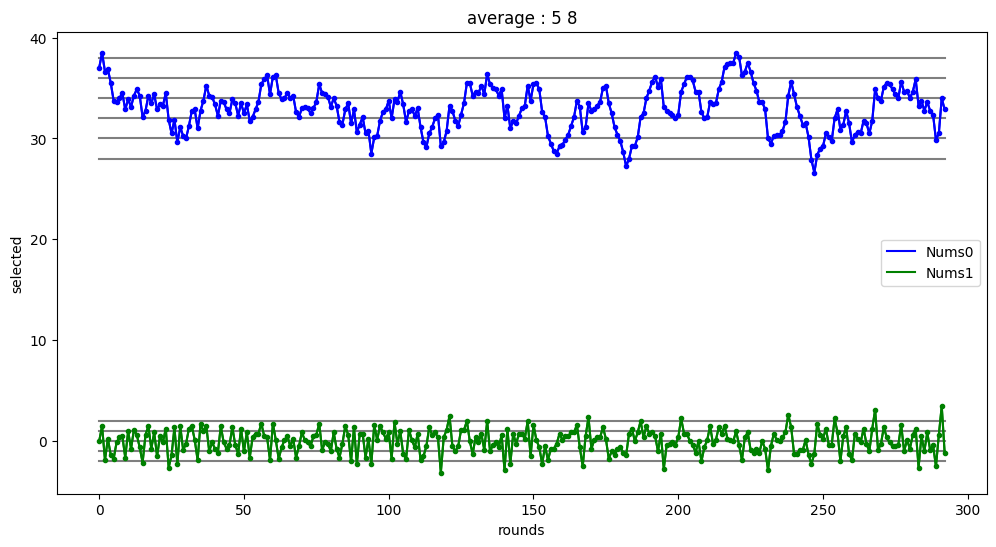

________________________________________
최소값          = [28.0, 28.1, 28.6, 28.7, 28.8]
마지막          = [33.1, 31.1, 32.1, 32.2, 31.7]


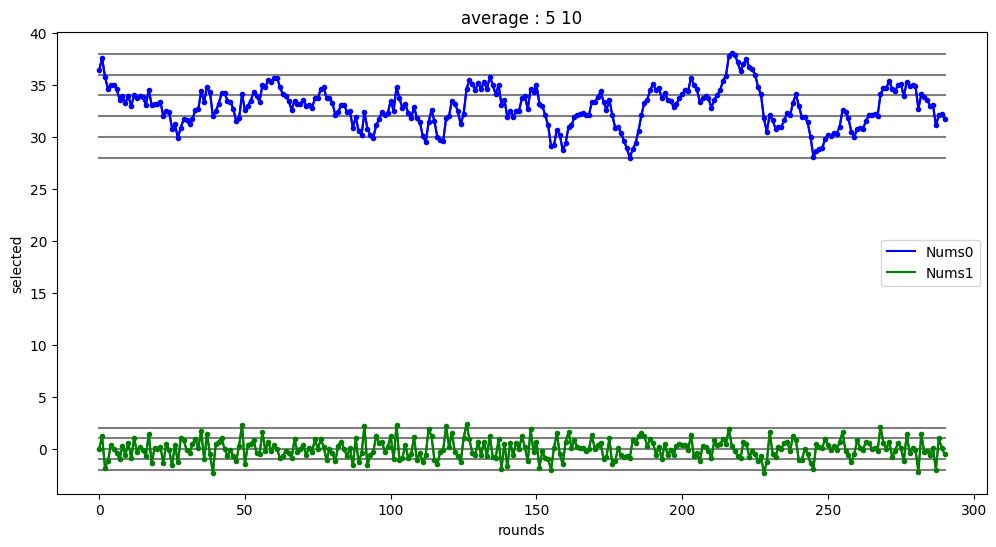

________________________________________
최소값          = [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.615384615384617]
마지막          = [33.53846153846154, 32.07692307692308, 32.46153846153846, 33.30769230769231, 32.84615384615385]


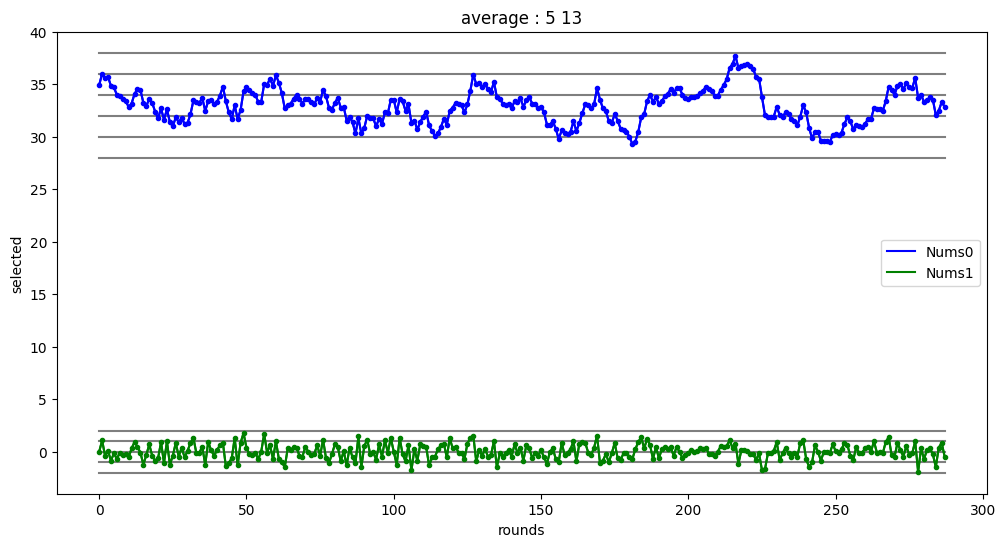

________________________________________
최소값          = [29.466666666666665, 29.466666666666665, 29.733333333333334, 29.866666666666667, 29.866666666666667]
마지막          = [33.13333333333333, 32.53333333333333, 33.2, 33.333333333333336, 33.0]


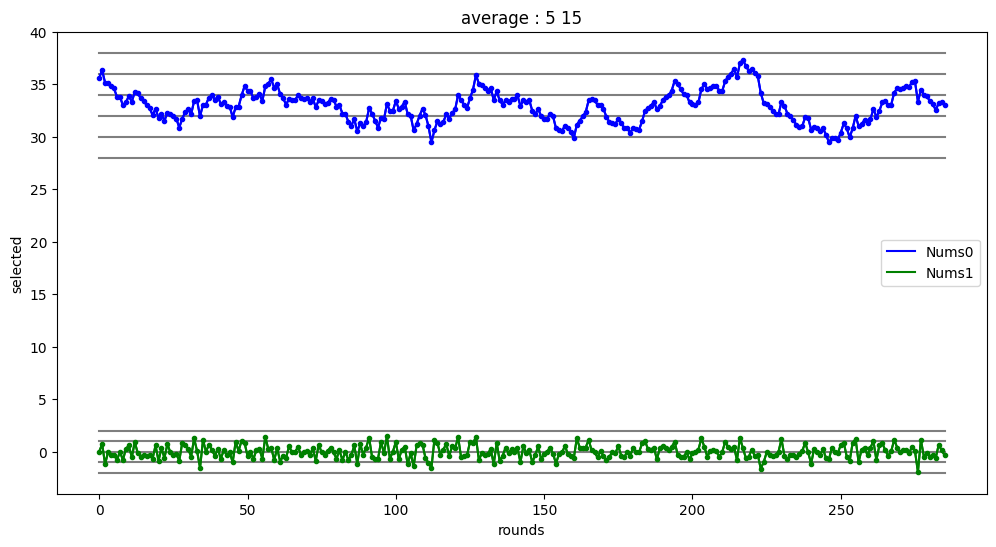

________________________________________
최소값          = [29.7, 29.85, 29.9, 30.3, 30.35]
마지막          = [33.5, 33.2, 33.5, 33.6, 33.3]


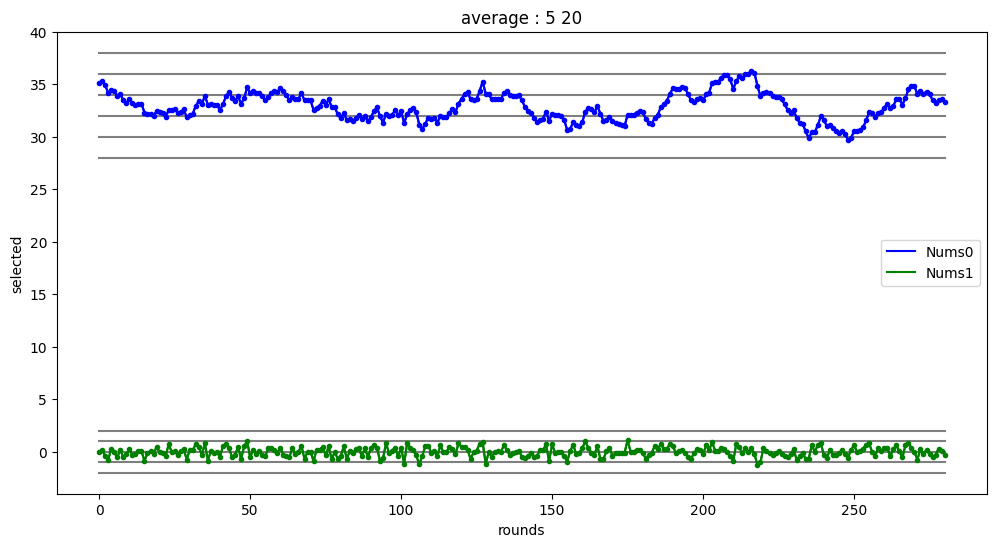

In [200]:
Round = 5
###################
selected = Round - 1
ext_data = 33
wanted_data_length = 20
helper_line_nums_1 = [12, 15, 20, 25, 30, 35, 40]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 28, 30, 32, 34, 36, 38]
lengths = [5, 8, 10, 13, 15, 20]
start_pos_0 = 150
start_pos_1 = 100
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

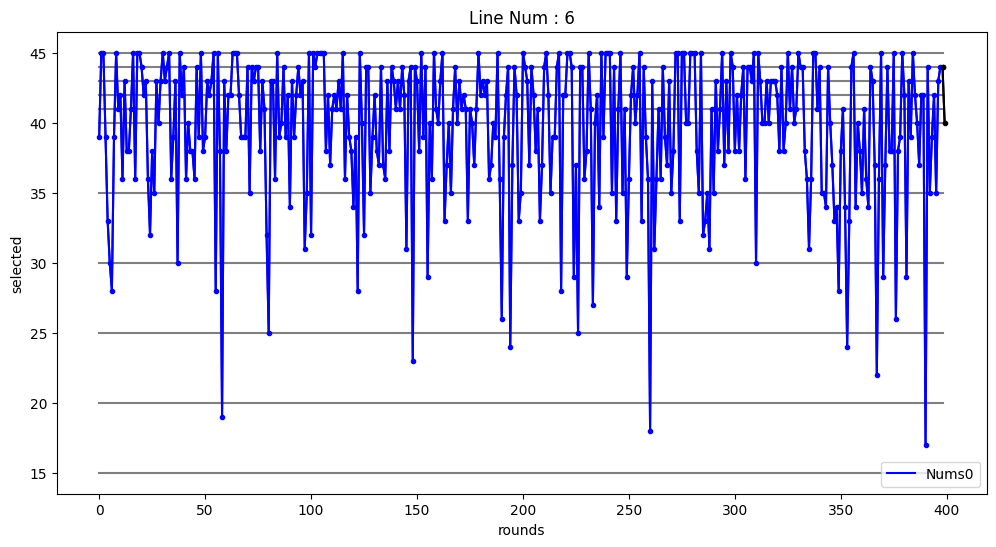

최소 값         = [17, 22, 24, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
최대 값         = [22, 24, 26, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 40
마지막 값        = 44
마지막 값들       = [45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44]
자주 나오는 값(부분) = [(31, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (33, 2), (29, 2), (39, 3), (37, 4), (36, 5), (41, 5), (35, 5), (34, 5), (42, 8), (43, 9), (40, 9), (38, 10), (45, 11), (44, 15)]
자주 나오는 값(전체) = [(26, 2), (24, 2), (30, 3), (28, 5), (32, 5), (31, 5), (29, 5), (34, 8), (33, 11), (37, 16), (35, 18), (36, 22), (40, 22), (39, 26), (41, 26), (38, 30), (42, 35), (43, 39), (44, 49), (45, 62)]
마지막 수의 앞과 뒤  = []
________________________________________
최소값          = [33.0, 33.8, 33.8, 34.0, 34.0]
마지막          = [39.0, 38.8, 40.6, 41.6, 41.2]


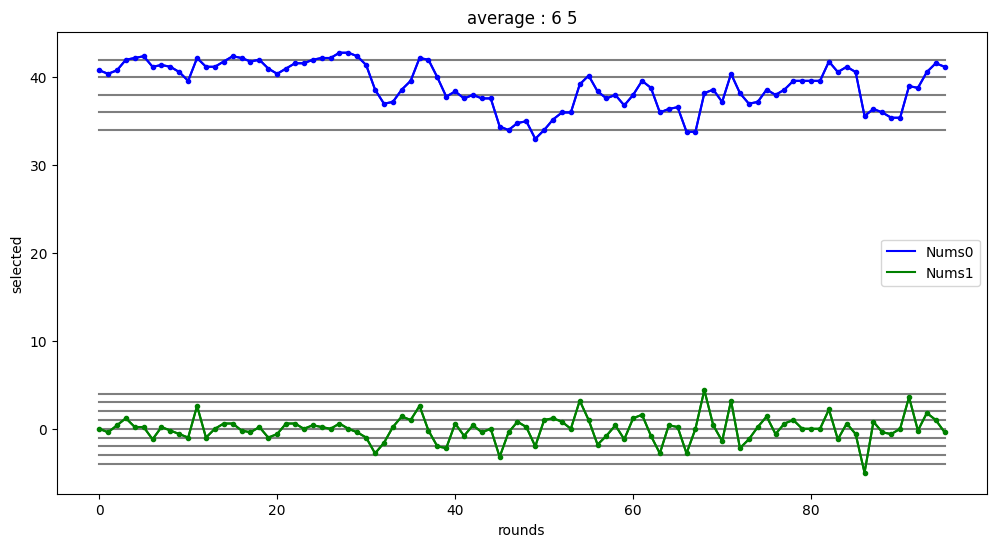

________________________________________
최소값          = [33.125, 33.625, 34.5, 35.625, 35.625]
마지막          = [37.0, 37.125, 37.375, 40.75, 40.25]


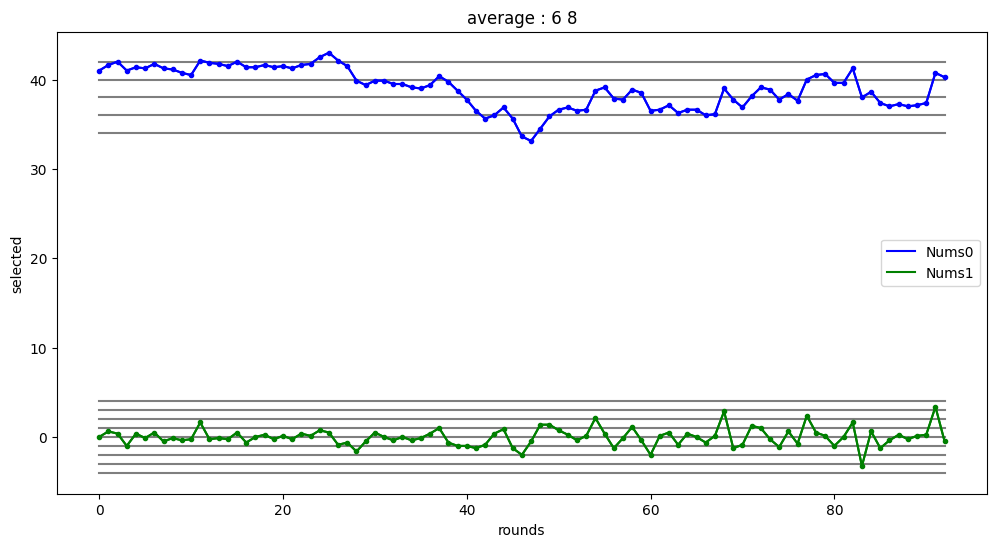

________________________________________
최소값          = [34.2, 34.6, 35.3, 35.4, 35.5]
마지막          = [37.3, 37.6, 38.3, 38.5, 38.3]


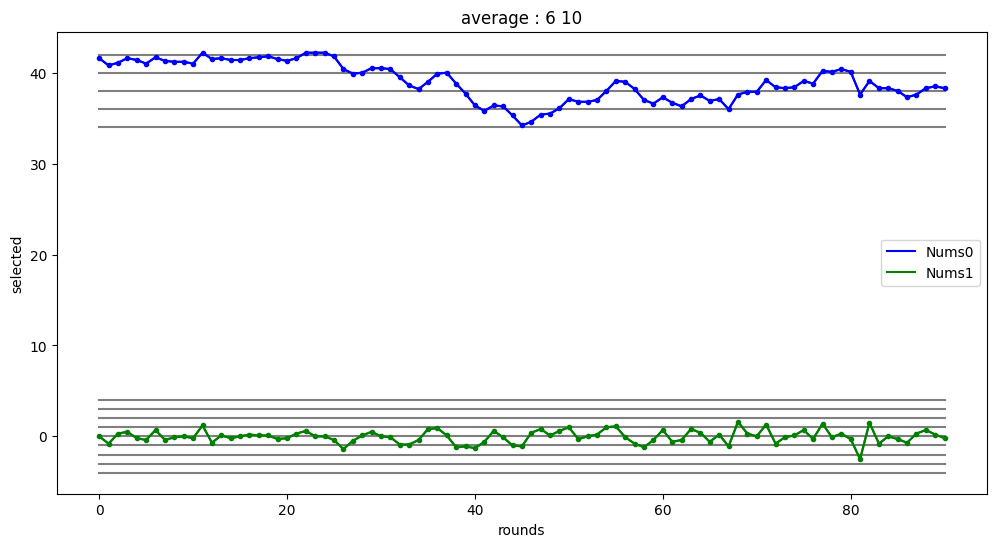

________________________________________
최소값          = [35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.76923076923077]
마지막          = [38.38461538461539, 38.69230769230769, 38.61538461538461, 38.76923076923077, 38.76923076923077]


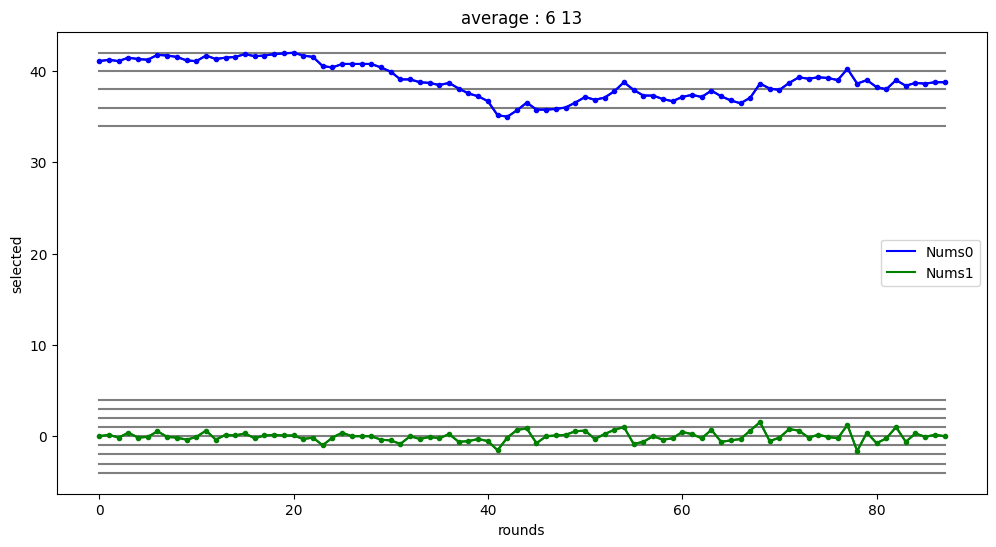

________________________________________
최소값          = [35.6, 35.6, 35.86666666666667, 36.13333333333333, 36.13333333333333]
마지막          = [38.06666666666667, 39.0, 39.06666666666667, 39.4, 39.06666666666667]


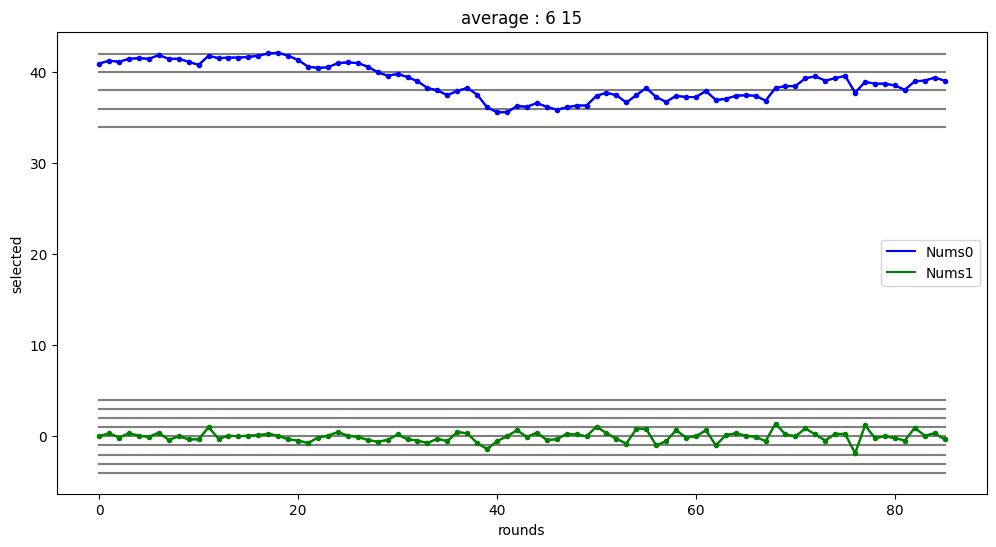

________________________________________
최소값          = [36.25, 36.3, 36.35, 36.55, 36.6]
마지막          = [38.05, 38.9, 39.2, 39.45, 39.2]


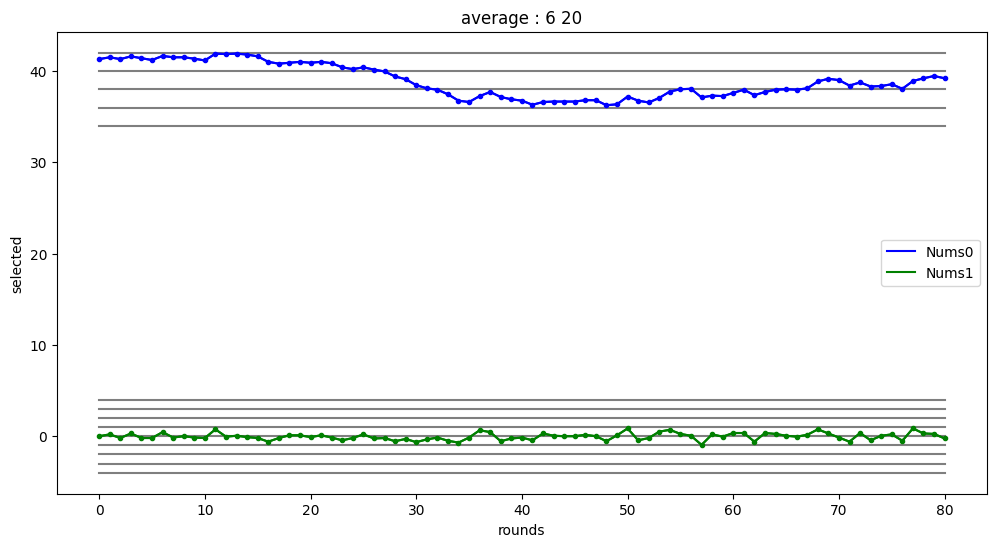

In [202]:
Round = 6
#################
selected = Round - 1
ext_data = 40
wanted_data_length = 20
helper_line_nums_1 = [15, 20, 25, 30, 35, 40, 41, 42, 43, 44, 45]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 34, 36, 38, 40, 42]
lengths = [5, 8, 10, 13, 15, 20]
start_pos_0 = 0
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

In [203]:
print(candidate)

{0: 1, 1: 3, 2: 21, 3: 28, 4: 33, 5: 40}


In [227]:
candidates = [[1, 3, 21, 28, 33, 40]
              ]

lasts = [
    [1, 16, 22, 23, 34, 38],
    [8, 16, 18, 19, 30, 33],
    [6, 9, 16, 19, 32, 36]
    ]

reals = [[3, 16, 18, 24, 40, 44],
         [5, 6, 11, 27, 43, 44]]

In [247]:
def draw_nums(ext_datas, is_pre_data=False, fig_size=(15, 8)):
    show_cols = [0, 1, 2, 3, 4, 5]
    show_label = False
    show_cnt = 100
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        end_pos = -1 if is_pre_data else len(row_list_none_last[i])
        show_data.append(row_list_none_last[i][start_pos:end_pos])
    print(ext_datas)
    draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40], fig_size=fig_size)

print('current work', datetime.now())

current work 2025-07-09 13:33:21.219171


[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


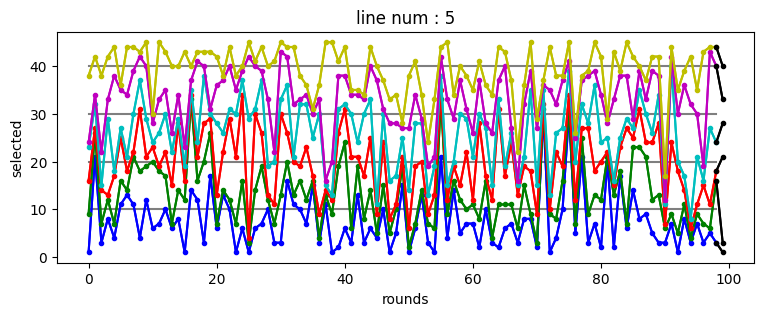

In [254]:
## My select 1180
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas=ext_datas, fig_size=(9, 3))

[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


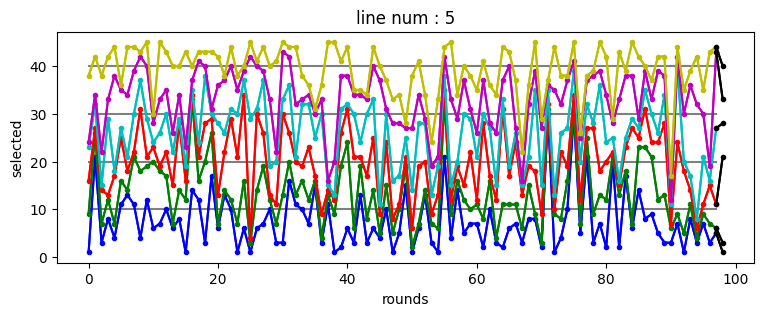

In [255]:
## My Select 1180 with 1178
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 8), (1, 16), (2, 18), (3, 19), (4, 30), (5, 33)]


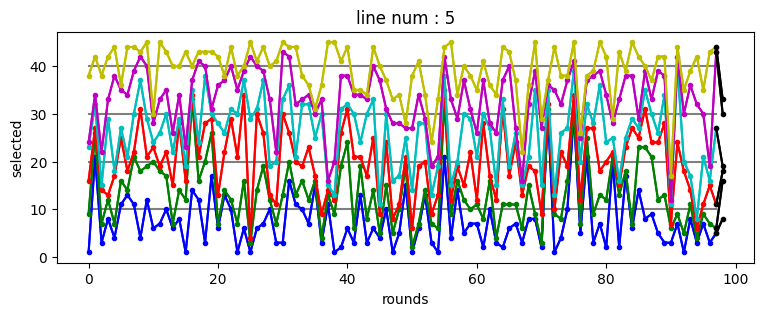

In [256]:
## My Select 1179_1 with 1178
cur_select = 1
ext_datas = [(i, lasts[cur_select][i]) for i in range(len(lasts[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 3), (1, 16), (2, 18), (3, 24), (4, 40), (5, 44)]


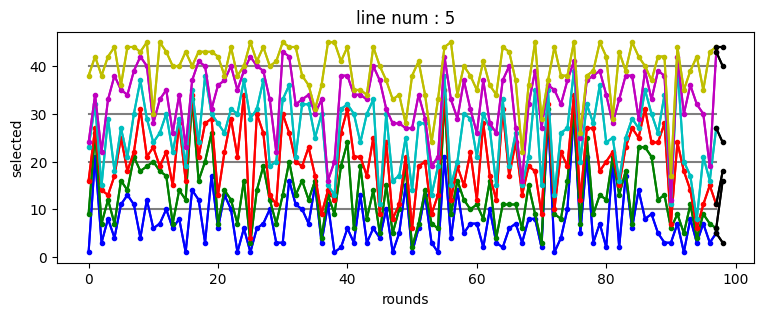

In [257]:
## real
cur_select = 0
ext_datas = [(i, reals[cur_select][i]) for i in range(len(reals[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


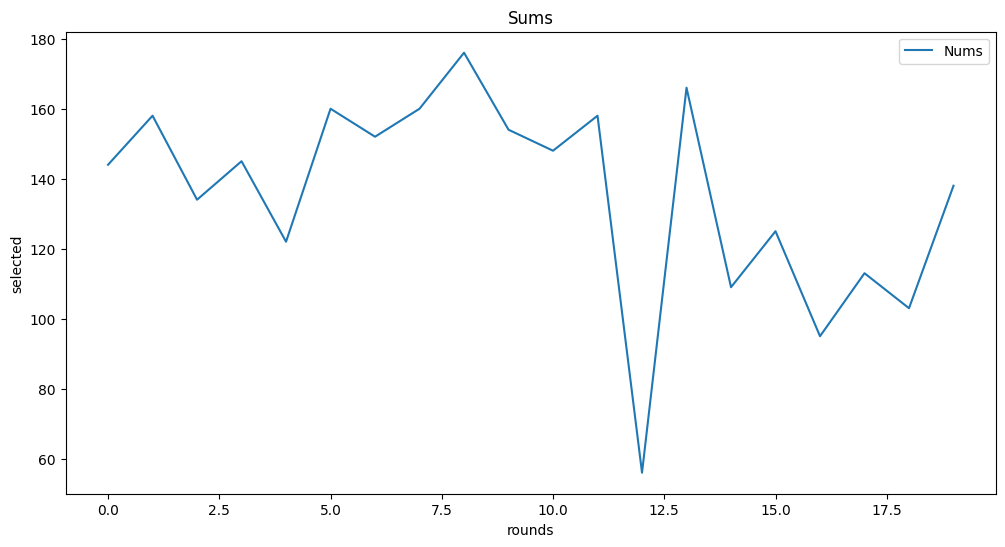

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))